# Installing Libraries

In [1]:
!pip install -q neuralprophet neuralforecast mlforecast statsforecast datasetsforecast arch pmdarima
!pip uninstall -y torchvision
!pip install -q torchvision

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires s

In [2]:
# import os
# try:
#     # import neuralprophet
#     import neuralforecast
#     import mlforecast 
#     import statsforecast
#     # import datasetsforecast
#     # import arch
#     # import pmdarima
# except:
#     os.system('pip install -q neuralprophet neuralforecast mlforecast statsforecast datasetsforecast arch pmdarima')
#     os.system('pip uninstall -y torchvision')
#     os.system('pip install -q torchvision')

# Importing Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-world-development-indicators/World_Development_Indicators.xlsx
/kaggle/input/dataset-world-development-indicators/World_Economy_Indicators.xlsx


# Importing Dataset

In [4]:
wdi_df = pd.read_excel('/kaggle/input/dataset-world-development-indicators/World_Development_Indicators.xlsx')
wdi_df = wdi_df[:1735]
wdi_df = wdi_df.replace('..', np.nan)
wdi_df = wdi_df.drop(['Country Code','Series Code'],axis=1)
wdi_df

,Country Name,Series Name,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,GDP per capita (current US$),62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,6.387332e+02,6.265129e+02,5.668811e+02,5.230530e+02,5.261408e+02,4.920906e+02,4.977414e+02,5.120551e+02,355.777826,NaN
1,Afghanistan,"Unemployment, total (% of total labor force) (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.915000e+00,NaN,NaN,1.118400e+01,NaN,NaN,1.171000e+01,5.580000,NaN
2,Afghanistan,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772e+00,4.673996e+00,-6.617092e-01,4.383892e+00,4.975952e+00,6.261491e-01,2.302373e+00,NaN,NaN,NaN
3,Afghanistan,"Foreign direct investment, net (BoP, current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.777403e+07,-4.299442e+07,-1.669836e+08,-7.958527e+07,-4.027316e+07,-8.063140e+07,2.916493e+06,2.425833e+07,NaN,NaN
4,Afghanistan,"Official exchange rate (LCU per US$, period av...",17.196561,17.196561,17.196561,35.109645,38.692262,38.692262,38.692262,38.692262,...,5.537750e+01,5.724750e+01,6.114346e+01,6.786609e+01,6.802690e+01,7.208325e+01,7.773795e+01,7.681354e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,Zimbabwe,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.634950e+00,-1.977848e-01,-2.430968e+00,-1.543670e+00,8.939623e-01,1.061887e+01,2.553050e+02,5.572018e+02,98.546105,1.047052e+02
1731,Zimbabwe,"Foreign direct investment, net (BoP, current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.730500e+08,-4.728000e+08,-3.992000e+08,-3.430138e+08,-3.062531e+08,-7.170786e+08,-2.470963e+08,-1.538600e+08,NaN,NaN
1732,Zimbabwe,"Official exchange rate (LCU per US$, period av...",0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.132901e+01,88.552447,3.749544e+02
1733,Zimbabwe,"Net trade in goods and services (BoP, current ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.226655e+09,-3.872564e+09,-3.250613e+09,-2.129621e+09,-1.581086e+09,-2.464036e+09,-1.314305e+08,-2.260065e+08,NaN,NaN


In [5]:
col_not_year = wdi_df.columns[:2].tolist()
col_year = wdi_df.columns[2:]
col_year = col_year.str.replace(r'[0-9]{4} \[(.*)\]',r'\1',regex=True).tolist()
col_orig = col_not_year + col_year
wdi_df.columns = col_orig
wdi_df

,Country Name,Series Name,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,Afghanistan,GDP per capita (current US$),62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,6.387332e+02,6.265129e+02,5.668811e+02,5.230530e+02,5.261408e+02,4.920906e+02,4.977414e+02,5.120551e+02,355.777826,NaN
1,Afghanistan,"Unemployment, total (% of total labor force) (...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.915000e+00,NaN,NaN,1.118400e+01,NaN,NaN,1.171000e+01,5.580000,NaN
2,Afghanistan,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772e+00,4.673996e+00,-6.617092e-01,4.383892e+00,4.975952e+00,6.261491e-01,2.302373e+00,NaN,NaN,NaN
3,Afghanistan,"Foreign direct investment, net (BoP, current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.777403e+07,-4.299442e+07,-1.669836e+08,-7.958527e+07,-4.027316e+07,-8.063140e+07,2.916493e+06,2.425833e+07,NaN,NaN
4,Afghanistan,"Official exchange rate (LCU per US$, period av...",17.196561,17.196561,17.196561,35.109645,38.692262,38.692262,38.692262,38.692262,...,5.537750e+01,5.724750e+01,6.114346e+01,6.786609e+01,6.802690e+01,7.208325e+01,7.773795e+01,7.681354e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,Zimbabwe,"Inflation, consumer prices (annual %)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.634950e+00,-1.977848e-01,-2.430968e+00,-1.543670e+00,8.939623e-01,1.061887e+01,2.553050e+02,5.572018e+02,98.546105,1.047052e+02
1731,Zimbabwe,"Foreign direct investment, net (BoP, current US$)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.730500e+08,-4.728000e+08,-3.992000e+08,-3.430138e+08,-3.062531e+08,-7.170786e+08,-2.470963e+08,-1.538600e+08,NaN,NaN
1732,Zimbabwe,"Official exchange rate (LCU per US$, period av...",0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.132901e+01,88.552447,3.749544e+02
1733,Zimbabwe,"Net trade in goods and services (BoP, current ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.226655e+09,-3.872564e+09,-3.250613e+09,-2.129621e+09,-1.581086e+09,-2.464036e+09,-1.314305e+08,-2.260065e+08,NaN,NaN


# Additional Functions

In [6]:
def merge_data_by_country(df, country):
    df = df[df['Country Name']==country]
    df_melt = pd.melt(df, id_vars='Series Name', value_vars=col_year)
    data_concat = []
    for col_series in df_melt['Series Name'].unique():
        df_melt_col = df_melt[df_melt['Series Name']==col_series]
        df_melt_col.loc[:, 'variable'] = df_melt_col.loc[:, 'variable'].str.replace('YR', '')
        df_melt_col.loc[:, 'variable'] = df_melt_col.loc[:, 'variable'].astype('int')
        df_melt_col = df_melt_col[['variable', 'value']]
        df_melt_col.columns = ['Year', col_series]
        df_melt_col = df_melt_col.sort_values(by='Year')
        df_melt_col = df_melt_col.reset_index(drop=True)
        data_concat.append(df_melt_col)
        
    hasil_df_melt = pd.concat(data_concat, axis=1)
    hasil_df_melt = hasil_df_melt.loc[:, ~hasil_df_melt.columns.duplicated()]
    hasil_df_melt['Negara'] = country
    desired_order = ['Negara'] + hasil_df_melt.drop('Negara', axis=1).columns.tolist()
    hasil_df_melt = hasil_df_melt[desired_order]
    return hasil_df_melt

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox


def prewhitening(series,verbose=False):
    copy_series = series.copy()
    adfuller_result = adfuller(copy_series)
    
    d = 0
    while adfuller_result[1] > 0.05:
        copy_series = copy_series.diff().dropna()
        d += 1
        adfuller_result = adfuller(copy_series)    
    
    order_arima_list = []
    aic_list = []
    bic_list = []
    
    for i in range(11):
        for j in range(11):
            p = i
            q = j
            
            model_arima = ARIMA(series,order=(p, d, q))
            model_arima_fit = model_arima.fit()
            
            results_as_html = model_arima_fit.summary().tables[0].as_html()
            aic_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
            
            results_as_html = model_arima_fit.summary().tables[1].as_html()
            summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
            
            hypothesis_test_df = acorr_ljungbox(model_arima_fit.resid, lags=11, return_df=True)
            
            if((np.all(summary_df.iloc[:,3] < 0.05) == True) and (np.all(hypothesis_test_df['lb_pvalue'] > 0.05) == True)):
                #print(f"p = {p}, d = {d}, q = {q}, AIC = {aic_df.iloc[1,2]}, BIC = {aic_df.iloc[2,2]}")
                order_arima_list.append((p, d, q))
                aic_list.append(aic_df.iloc[1,2])
                bic_list.append(aic_df.iloc[2,2])
    order_arima_df = pd.DataFrame({"p": [x[0] for x in order_arima_list],
                                   "d": [x[1] for x in order_arima_list],
                                   "q": [x[2] for x in order_arima_list],
                                   "AIC": aic_list, 
                                   "BIC": bic_list})
    order_arima_df = order_arima_df.sort_values(by=["BIC","AIC"])
    order_arima_df = order_arima_df.reset_index(drop=True)
    
    model_arima_asli = ARIMA(series,order=(order_arima_df['p'].iloc[0], d, order_arima_df['q'].iloc[0]))
    model_arima_asli_fit = model_arima_asli.fit()
    
    
    if verbose == True:
        fig, ax = plt.subplots(1,2,figsize=(15,6))
        plot_acf(copy_series, ax=ax[0])
        plot_pacf(copy_series, ax=ax[1])
        plt.show()

        display(model_arima_asli_fit.summary())
        display(order_arima_df)

        model_arima_asli_fit.plot_diagnostics(figsize=(18, 12))
        plt.show()
        
        print(acorr_ljungbox(model_arima_asli_fit.resid, lags=15))
        
    result_whitening = model_arima_asli_fit.resid
    
    return result_whitening

In [8]:
from statsmodels.tsa.stattools import ccf

def cross_correlation_white(series1,series2):
    series1_white = prewhitening(series1)
    series2_white = prewhitening(series2)
    
    series1_white = series1_white.loc[series1_white.index.intersection(series2_white.index)]
    series2_white = series2_white.loc[series2_white.index.intersection(series1_white.index)]
    
    result_ccf = ccf(series1_white,series2_white)
    return result_ccf

In [9]:
def cross_correlation_ccf(series1,series2):
    right_ccf = ccf(series1,series2,adjusted=False)
    left_ccf = ccf(series2,series1,adjusted=False,)
    left_ccf = left_ccf[1:]
    left_ccf = np.flip(left_ccf)
    
    lags_index = np.arange(-len(series1)+1,len(series2),)    
    concat_ccf = np.concatenate((left_ccf,right_ccf),axis=0)
    return lags_index, concat_ccf

In [10]:
from pandas.api.types import is_list_like

def invers_diff(series,first_value):
    series_index = series.index
    series_np = series.to_numpy()
    if(is_list_like(first_value)):
        for i in range(len(first_value)):
            series_np = np.insert(series_np,0,first_value[i]).cumsum()
        series_index = pd.date_range(end=series_index[-1],
                                     periods=len(series_np),
                                     freq=series_index.freqstr)
    else:
        series_np = np.insert(series_np,0,first_value).cumsum()
        series_index = pd.date_range(end=series_index[-1],
                                     periods=len(series_np),
                                     freq=series_index.freqstr)
    result_series = pd.Series(series_np,index=series_index)
    return result_series

In [11]:
def granger_causality_all_pairs(df, max_lag=5, verbose=False):
    """
    Perform Granger causality test on all possible pairs of time series in a DataFrame.
    Apply differencing until stationarity is achieved.

    Parameters:
    - df: pandas DataFrame with multiple columns.
    - max_lag: maximum lag to consider in the test (default is 4).
    - verbose: whether to print the results (default is True).

    Returns:
    - dict: Granger causality test results and lags for all pairs of columns.
    """

    # Ensure there are more than one column in the DataFrame
    if len(df.columns) < 2:
        raise ValueError("The DataFrame must have at least two columns for Granger causality testing.")

    # Get all possible pairs of columns
    all_pairs = list(permutations(df.columns, 2))

    # Perform Granger causality test for each pair
    results_dict = {}
    for pair in all_pairs:
        # Make a copy of the DataFrame to avoid modifying the original
        df_copy = df.copy()

        # Drop rows with inf and NaN values
        df_copy = df_copy.replace([np.inf, -np.inf], np.nan).dropna(subset=list(pair), how='any')

        # Check for stationarity using Augmented Dickey-Fuller test
        def is_stationary(ts):
            result = adfuller(ts)
            return result[1] <= 0.05  # Check if p-value is less than or equal to 0.05

        # Differencing until stationarity is achieved
        differencing_steps = {column: 0 for column in pair}
        
        first_value = dict()
        
        for column in pair:
            coba_col = []
            while not is_stationary(df_copy[column]) and len(df_copy) > 3 * max_lag:
                # Perform differencing
                coba_col.append(df_copy.loc[:, [column]].to_numpy()[0])
                df_copy[column] = df_copy[column].diff()

                # Drop rows with inf and NaN values after differencing
                df_copy = df_copy.replace([np.inf, -np.inf], np.nan).dropna(subset=[column], how='any')

                differencing_steps[column] += 1
            first_value[column] =  np.flip(np.array(coba_col).ravel())

        # Check if there are sufficient observations for the Granger causality test
        if len(df_copy) <= 3 * max_lag:
            print(f"Warning: Pair {pair} has insufficient observations for Granger causality test. Skipping.")
            continue

        # Perform Granger causality test
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            results = grangercausalitytests(df_copy[list(pair)], max_lag, verbose=verbose)

        lags_used = []
        for i in range(1,max_lag+1):
            #print(results[i][0]['ssr_ftest'])
            if results[i][0]['ssr_ftest'][1] < 0.05:
                lags_used.append(i)
                #print(results[i][0]['ssr_ftest'][1])
        
        #print(results[max_lag])
        # lags_used = {column: results[max_lag][column][0]['ssr_ftest'][1] for column in pair}

        
        # Store results and lags in the dictionary
        results_dict[pair] = {'results': results, 
                              'lags_used': lags_used,
                              'differencing_steps': differencing_steps,
                              'first_value_difference': first_value,
                             }

    return results_dict

# Subsetting Data to Indonesia

In [12]:
indonesia_df = merge_data_by_country(wdi_df, 'Indonesia')
indonesia_df = indonesia_df.drop('Negara', axis=1)
indonesia_df = indonesia_df.set_index('Year')
indonesia_df.index = pd.to_datetime(indonesia_df.index, format='%Y')
print(indonesia_df.isna().sum()/indonesia_df.shape[0])
indonesia_df = indonesia_df.drop('Present value of external debt (current US$)', axis=1)
indonesia_df

GDP per capita (current US$)                                        0.111111
Unemployment, total (% of total labor force) (national estimate)    0.349206
Inflation, consumer prices (annual %)                               0.000000
Foreign direct investment, net (BoP, current US$)                   0.333333
Official exchange rate (LCU per US$, period average)                0.111111
Net trade in goods and services (BoP, current US$)                  0.333333
Present value of external debt (current US$)                        0.984127
Consumer price index (2010 = 100)                                   0.000000
dtype: float64


,GDP per capita (current US$),"Unemployment, total (% of total labor force) (national estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net (BoP, current US$)","Official exchange rate (LCU per US$, period average)","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100)
Year,,,,,,,
1960-01-01,NaN,NaN,39.590444,NaN,NaN,NaN,0.000278
1961-01-01,NaN,NaN,13.691932,NaN,NaN,NaN,0.000316
1962-01-01,NaN,NaN,131.397849,NaN,NaN,NaN,0.000731
1963-01-01,NaN,NaN,145.910781,NaN,NaN,NaN,0.001796
1964-01-01,NaN,NaN,108.994709,NaN,NaN,NaN,0.003755
...,...,...,...,...,...,...,...
2018-01-01,3902.661676,4.387,3.198346,-1.251061e+10,14236.938773,-6.713373e+09,146.729898
2019-01-01,4151.227554,3.590,3.030587,-2.053107e+10,14147.671361,-4.133324e+09,151.176675
2020-01-01,3895.618152,4.255,1.920968,-1.414247e+10,14582.203468,1.854579e+10,154.080731


In [13]:
indonesia_df.shape

(63, 7)

# EDA

<Axes: xlabel='Year'>

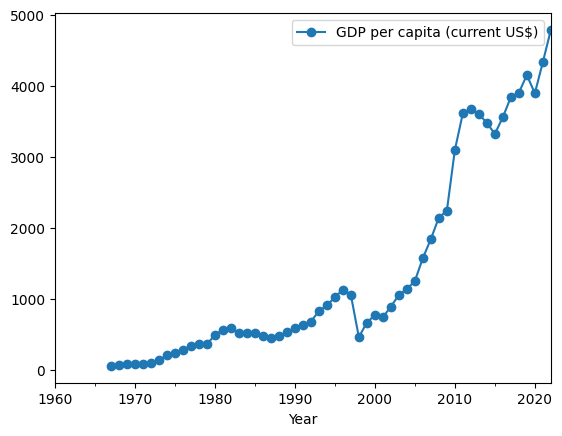

In [14]:
indonesia_df.plot(y=['GDP per capita (current US$)',
                     #'Unemployment, total (% of total labor force) (national estimate)',
                     #'Inflation, consumer prices (annual %)',
                     #'Consumer price index (2010 = 100)',
                     #'Net trade in goods and services (BoP, current US$)',
                     #'Official exchange rate (LCU per US$, period average)',
                     #'Foreign direct investment, net (BoP, current US$)',
                    ],style='o-')

In [15]:
indonesia_df = indonesia_df.interpolate(method='time', limit_direction='both')
indonesia_df

,GDP per capita (current US$),"Unemployment, total (% of total labor force) (national estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net (BoP, current US$)","Official exchange rate (LCU per US$, period average)","Net trade in goods and services (BoP, current US$)",Consumer price index (2010 = 100)
Year,,,,,,,
1960-01-01,53.338196,1.920,39.590444,-1.330000e+08,149.583333,2.257000e+09,0.000278
1961-01-01,53.338196,1.920,13.691932,-1.330000e+08,149.583333,2.257000e+09,0.000316
1962-01-01,53.338196,1.920,131.397849,-1.330000e+08,149.583333,2.257000e+09,0.000731
1963-01-01,53.338196,1.920,145.910781,-1.330000e+08,149.583333,2.257000e+09,0.001796
1964-01-01,53.338196,1.920,108.994709,-1.330000e+08,149.583333,2.257000e+09,0.003755
...,...,...,...,...,...,...,...
2018-01-01,3902.661676,4.387,3.198346,-1.251061e+10,14236.938773,-6.713373e+09,146.729898
2019-01-01,4151.227554,3.590,3.030587,-2.053107e+10,14147.671361,-4.133324e+09,151.176675
2020-01-01,3895.618152,4.255,1.920968,-1.414247e+10,14582.203468,1.854579e+10,154.080731


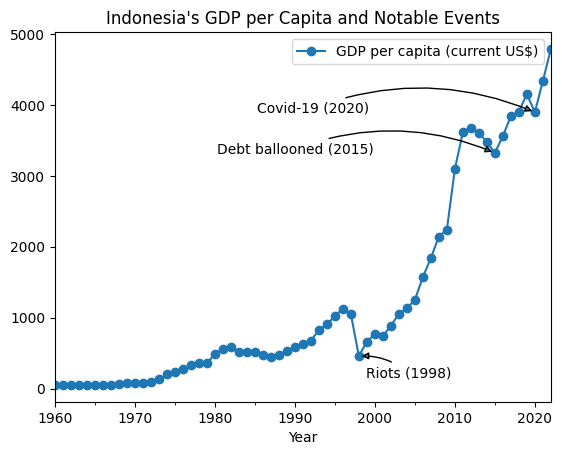

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=['GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          # 'Inflation, consumer prices (annual %)',
                          # 'Consumer price index (2010 = 100)',
                          # 'Net trade in goods and services (BoP, current US$)',
                          # 'Official exchange rate (LCU per US$, period average)',
                          # 'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')

# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'GDP per capita (current US$)']
kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']

# Add the annotation
ax.annotate(f"Riots (1998)",
            xy=('1998-01-01', kejadian_kerusuhan),
            xytext=(5, -15),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.2'))

ax.annotate(f"Covid-19 (2020)",
            xy=('2020-01-01', kejadian_covid),
            xytext=(-200, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2'))

ax.annotate(f"Debt ballooned (2015)",
            xy=('2015-01-01', kejadian_utang),
            xytext=(-200, -0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2'))

ax.set_title("Indonesia's GDP per Capita and Notable Events")  # Replace with your desired title

plt.show()

<Axes: xlabel='Year'>

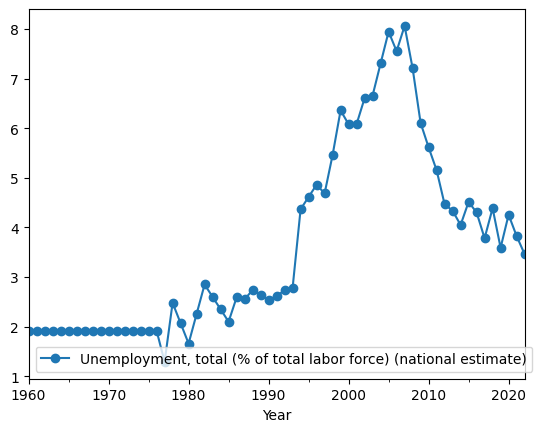

In [17]:
indonesia_df.plot(y=[#'GDP per capita (current US$)',
                     'Unemployment, total (% of total labor force) (national estimate)',
                     # 'Inflation, consumer prices (annual %)',
                     # 'Consumer price index (2010 = 100)',
                     # 'Net trade in goods and services (BoP, current US$)',
                     # 'Official exchange rate (LCU per US$, period average)',
                     # 'Foreign direct investment, net (BoP, current US$)',
                     ], style='o-')

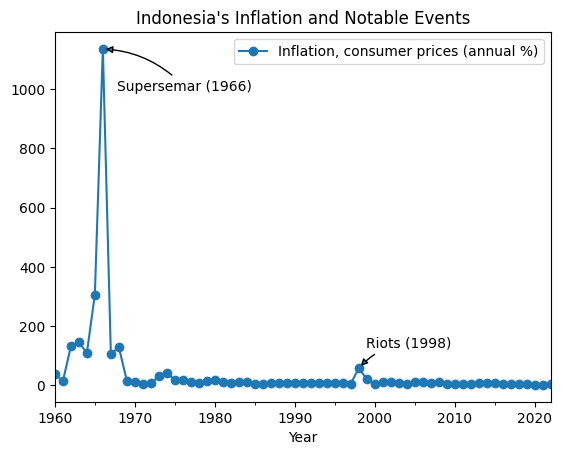

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=[#'GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          'Inflation, consumer prices (annual %)',
                          # 'Consumer price index (2010 = 100)',
                          # 'Net trade in goods and services (BoP, current US$)',
                          # 'Official exchange rate (LCU per US$, period average)',
                          # 'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')


# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
kejadian_supersemar = indonesia_df.loc['1966-01-01', 'Inflation, consumer prices (annual %)']
kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'Inflation, consumer prices (annual %)']
# kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
# kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']

# Add the annotation
ax.annotate(f"Riots (1998)",
            xy=('1998-01-01', kejadian_kerusuhan),
            xytext=(5, 15),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.2'))

ax.annotate(f"Supersemar (1966)",
            xy=('1966-01-01', kejadian_supersemar),
            xytext=(10, -30),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.2'))


ax.set_title("Indonesia's Inflation and Notable Events")  # Replace with your desired title

plt.show()

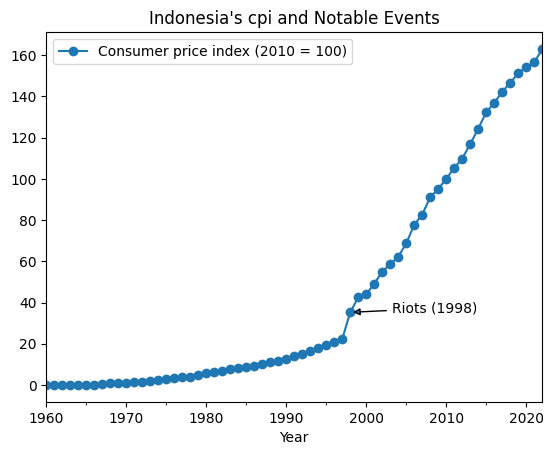

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=[#'GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          #'Inflation, consumer prices (annual %)',
                          'Consumer price index (2010 = 100)',
                          # 'Net trade in goods and services (BoP, current US$)',
                          # 'Official exchange rate (LCU per US$, period average)',
                          # 'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')


# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
# kejadian_supersemar = indonesia_df.loc['1966-01-01', 'Inflation, consumer prices (annual %)']
kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'Consumer price index (2010 = 100)']
# kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
# kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']

# Add the annotation
ax.annotate(f"Riots (1998)",
            xy=('1998-01-01', kejadian_kerusuhan),
            xytext=(30, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.set_title("Indonesia's cpi and Notable Events")  # Replace with your desired title

plt.show()

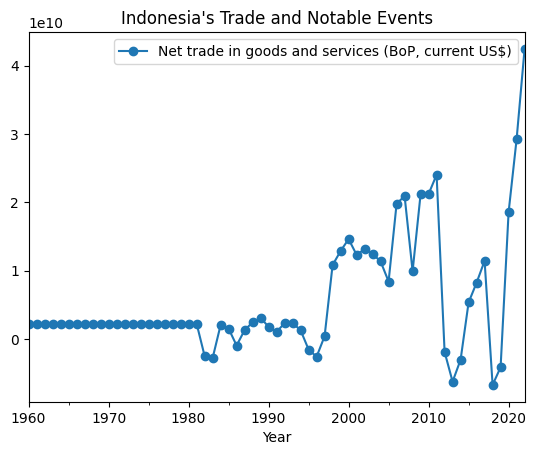

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=[#'GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          # 'Inflation, consumer prices (annual %)',
                          # 'Consumer price index (2010 = 100)',
                           'Net trade in goods and services (BoP, current US$)',
                          # 'Official exchange rate (LCU per US$, period average)',
                          # 'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')


# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
# kejadian_supersemar = indonesia_df.loc['1966-01-01', 'Inflation, consumer prices (annual %)']
#kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'Consumer price index (2010 = 100)']
# kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
# kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']

# Add the annotation
# ax.annotate(f"Riots (1998)",
#             xy=('1998-01-01', kejadian_kerusuhan),
#             xytext=(30, 0),  # Adjust text offset as needed
#             textcoords='offset points',
#             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.set_title("Indonesia's Trade and Notable Events")  # Replace with your desired title

plt.show()

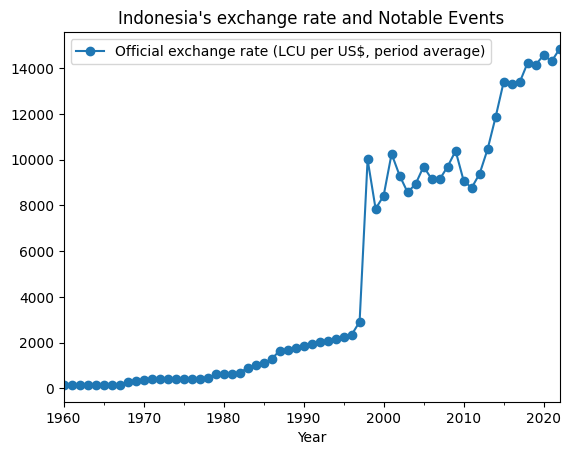

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=[#'GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          # 'Inflation, consumer prices (annual %)',
                          # 'Consumer price index (2010 = 100)',
                          # 'Net trade in goods and services (BoP, current US$)',
                          'Official exchange rate (LCU per US$, period average)',
                          # 'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')


# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
# kejadian_supersemar = indonesia_df.loc['1966-01-01', 'Inflation, consumer prices (annual %)']
#kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'Consumer price index (2010 = 100)']
# kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
# kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']

# Add the annotation
# ax.annotate(f"Riots (1998)",
#             xy=('1998-01-01', kejadian_kerusuhan),
#             xytext=(30, 0),  # Adjust text offset as needed
#             textcoords='offset points',
#             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.set_title("Indonesia's exchange rate and Notable Events")  # Replace with your desired title

plt.show()

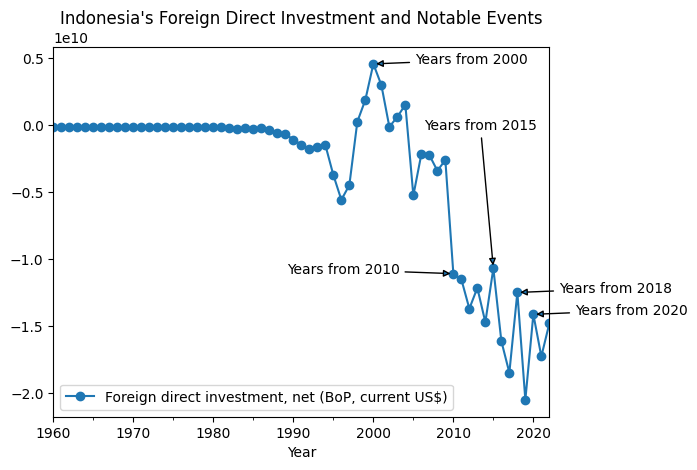

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrame 'indonesia_df' with a datetime index

ax = indonesia_df.plot(y=[#'GDP per capita (current US$)',
                          # 'Unemployment, total (% of total labor force) (national estimate)',
                          # 'Inflation, consumer prices (annual %)',
                          # 'Consumer price index (2010 = 100)',
                          # 'Net trade in goods and services (BoP, current US$)',
                          # 'Official exchange rate (LCU per US$, period average)',
                          'Foreign direct investment, net (BoP, current US$)',
                          ], style='o-')


# Get the value for 'GDP per capita (current US$)' at index '1998-01-01'
kejadian_2000 = indonesia_df.loc['2000-01-01', 'Foreign direct investment, net (BoP, current US$)']
kejadian_2010 = indonesia_df.loc['2010-01-01', 'Foreign direct investment, net (BoP, current US$)']
kejadian_2015 = indonesia_df.loc['2015-01-01', 'Foreign direct investment, net (BoP, current US$)']
kejadian_2018 = indonesia_df.loc['2018-01-01', 'Foreign direct investment, net (BoP, current US$)']
kejadian_2020 = indonesia_df.loc['2020-01-01', 'Foreign direct investment, net (BoP, current US$)']

# kejadian_supersemar = indonesia_df.loc['1966-01-01', 'Inflation, consumer prices (annual %)']
# kejadian_kerusuhan = indonesia_df.loc['1998-01-01', 'Consumer price index (2010 = 100)']
# kejadian_covid = indonesia_df.loc['2020-01-01', 'GDP per capita (current US$)']
# kejadian_utang = indonesia_df.loc['2015-01-01', 'GDP per capita (current US$)']


# Add the annotation
ax.annotate(f"Years from 2000",
            xy=('2000-01-01', kejadian_2000),
            xytext=(30, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.annotate(f"Years from 2010",
            xy=('2010-01-01', kejadian_2010),
            xytext=(-120, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.annotate(f"Years from 2015",
            xy=('2015-01-01', kejadian_2015),
            xytext=(-50, 100),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))

ax.annotate(f"Years from 2018",
            xy=('2018-01-01', kejadian_2018),
            xytext=(30, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))


ax.annotate(f"Years from 2020",
            xy=('2020-01-01', kejadian_2020),
            xytext=(30, 0),  # Adjust text offset as needed
            textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=0.0'))



ax.set_title("Indonesia's Foreign Direct Investment and Notable Events")  # Replace with your desired title

plt.show()

# Correlation

<Axes: >

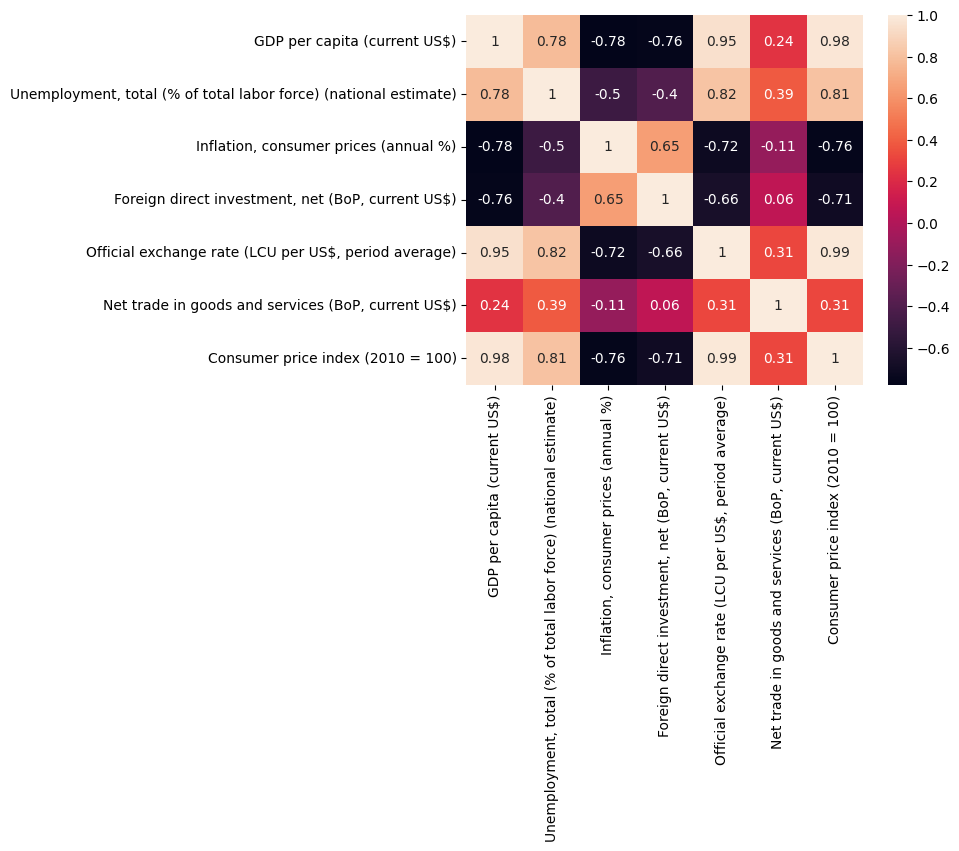

In [23]:
import seaborn as sns
sns.heatmap(indonesia_df.corr(method='spearman'), annot=True)

# Cross Correlation

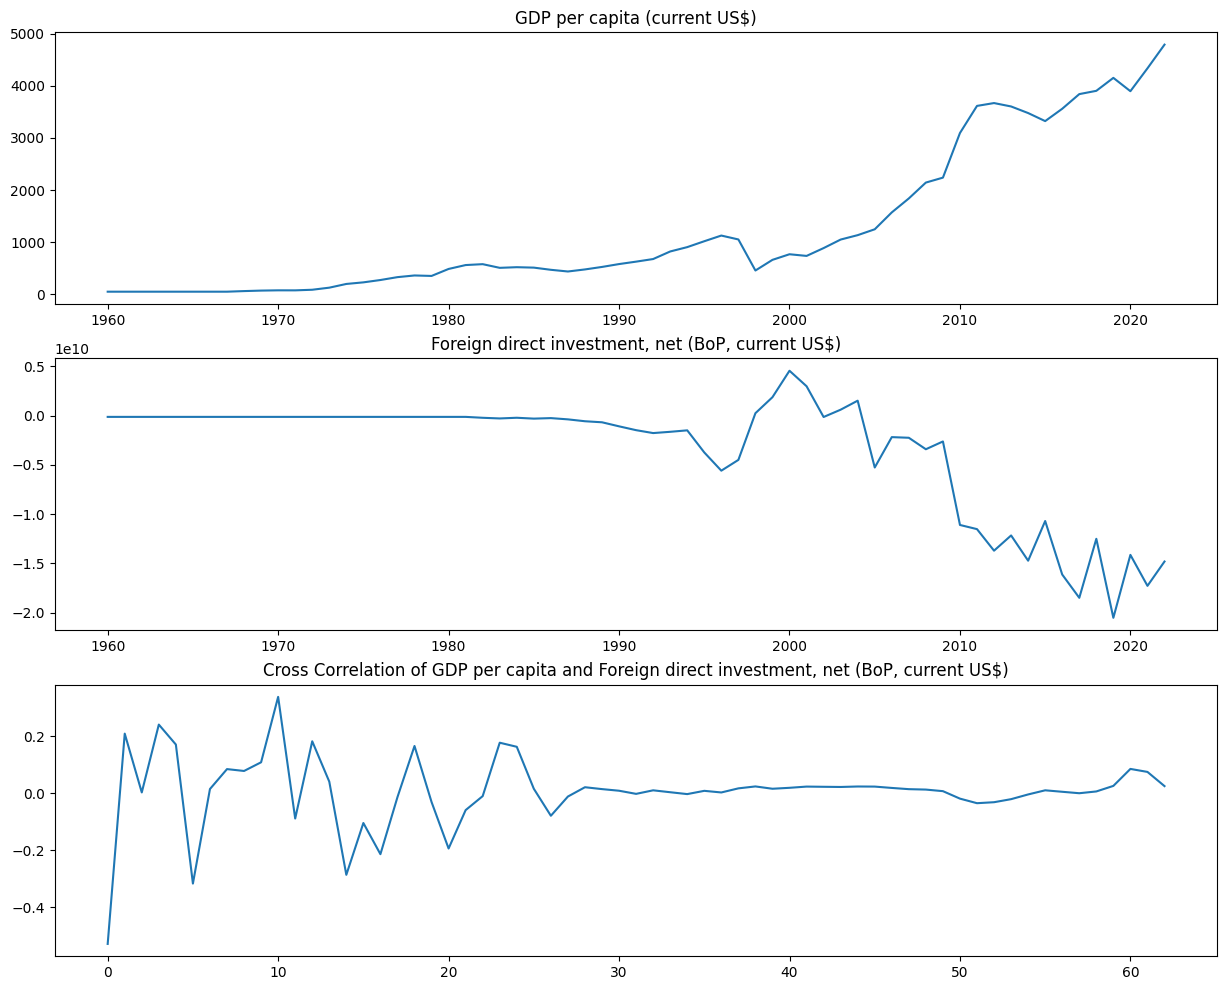

In [24]:
import warnings
warnings.filterwarnings("ignore")

fig_corr, ax_corr = plt.subplots(3,1,figsize=(15,12))    

ax_corr[0].plot(indonesia_df['GDP per capita (current US$)'])
ax_corr[0].set_title('GDP per capita (current US$)')

ax_corr[1].plot(indonesia_df['Foreign direct investment, net (BoP, current US$)'])
ax_corr[1].set_title('Foreign direct investment, net (BoP, current US$)')

ax_corr[2].plot(cross_correlation_white(indonesia_df['GDP per capita (current US$)'],
                                        indonesia_df['Foreign direct investment, net (BoP, current US$)']
                                       )
               )
ax_corr[2].set_title('Cross Correlation of GDP per capita and Foreign direct investment, net (BoP, current US$)')
plt.show()

Cross Correlation Value : 0.8472521525879807
in Lag : -12


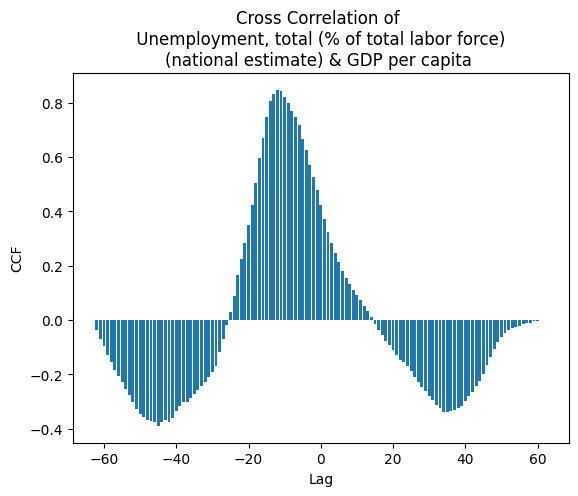

In [25]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)

plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) \n(national estimate) & GDP per capita ')
plt.show()

Cross Correlation Value : 0.4121706821277157
in Lag : -56


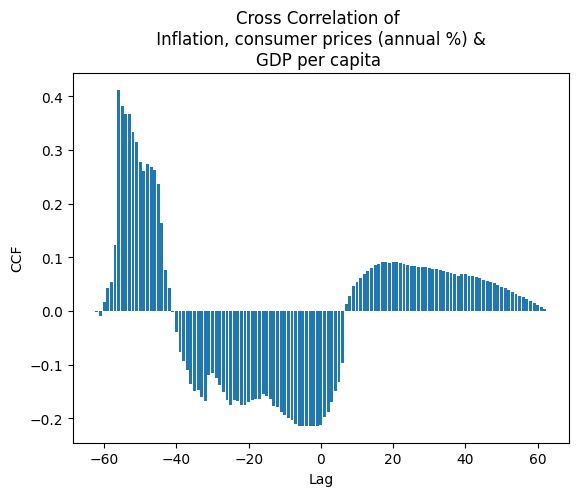

In [26]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Inflation, consumer prices (annual %)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)

plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Inflation, consumer prices (annual %) & \nGDP per capita ')
plt.show()

Cross Correlation Value : -0.9333203480961821
in Lag : 0


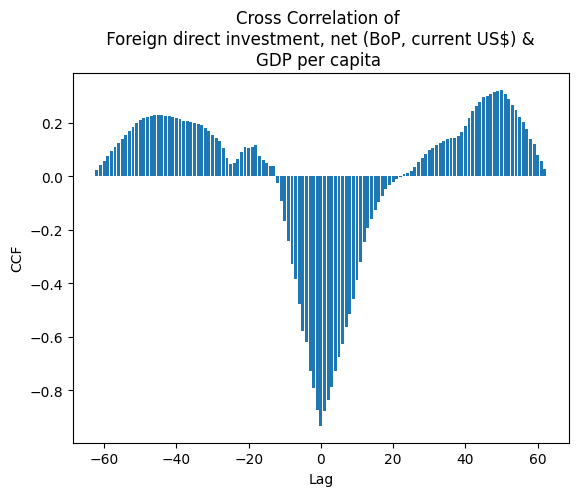

In [27]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)

plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Foreign direct investment, net (BoP, current US$) & \nGDP per capita ')
plt.show()

Cross Correlation Value : 0.8799544945575344
in Lag : 0


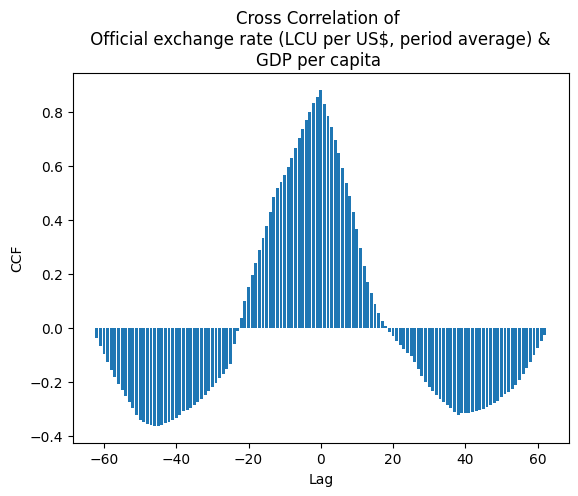

In [28]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Official exchange rate (LCU per US$, period average) & \nGDP per capita ')
plt.show()

Cross Correlation Value : 0.5376342223570625
in Lag : -11


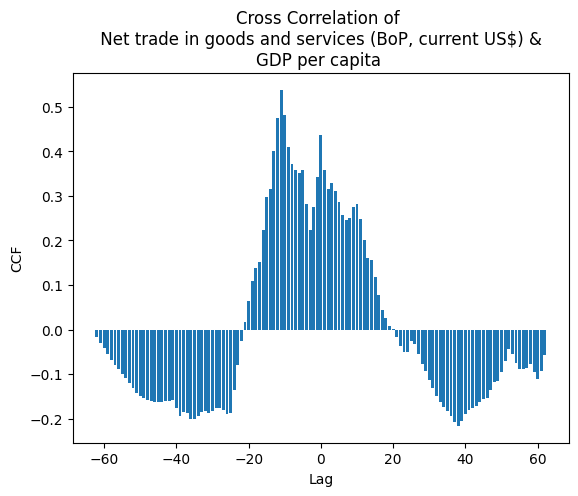

In [29]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Net trade in goods and services (BoP, current US$) & \nGDP per capita ')
plt.show()

Cross Correlation Value : 0.9726699618898522
in Lag : 0


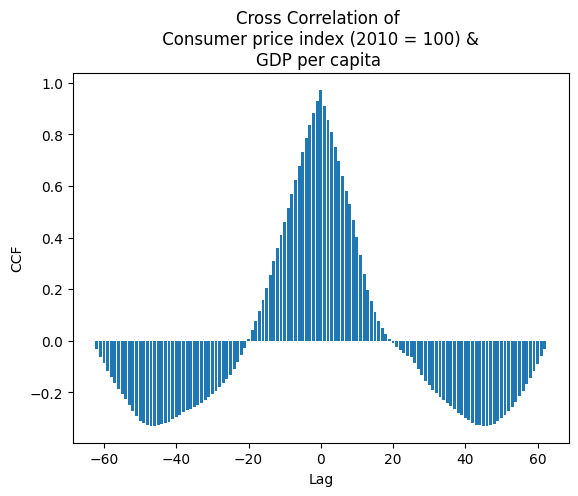

In [30]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Consumer price index (2010 = 100)'],
                                         indonesia_df['GDP per capita (current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)

plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Consumer price index (2010 = 100) & \nGDP per capita ')
plt.show()

Cross Correlation Value : 0.40129277342710123
in Lag : 41


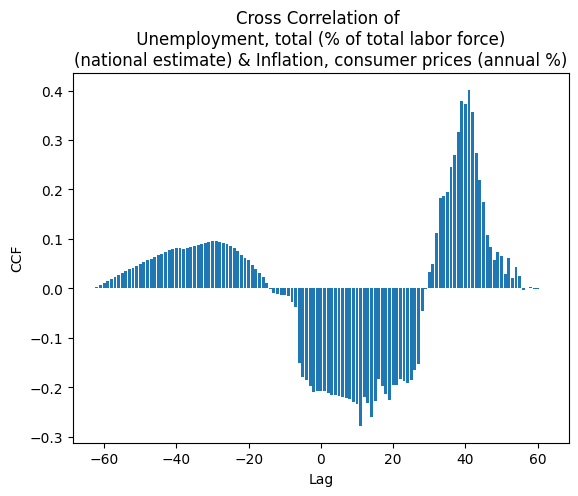

In [31]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['Inflation, consumer prices (annual %)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) \n(national estimate) & Inflation, consumer prices (annual %)')
plt.show()

Cross Correlation Value : -0.8518752059972104
in Lag : -12


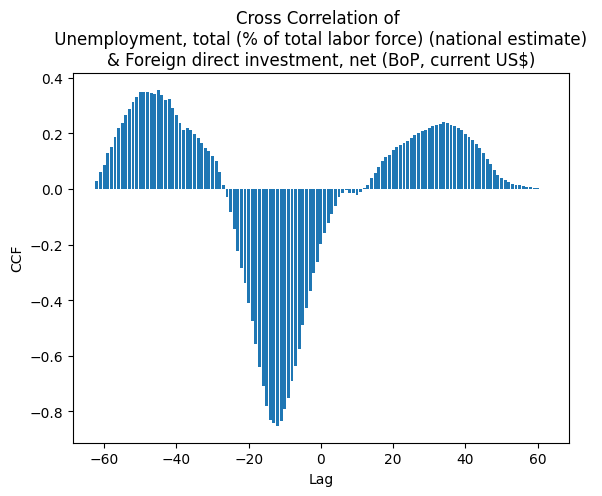

In [32]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) (national estimate) \n& Foreign direct investment, net (BoP, current US$)')
plt.show()

Cross Correlation Value : 0.7720247933777249
in Lag : -10


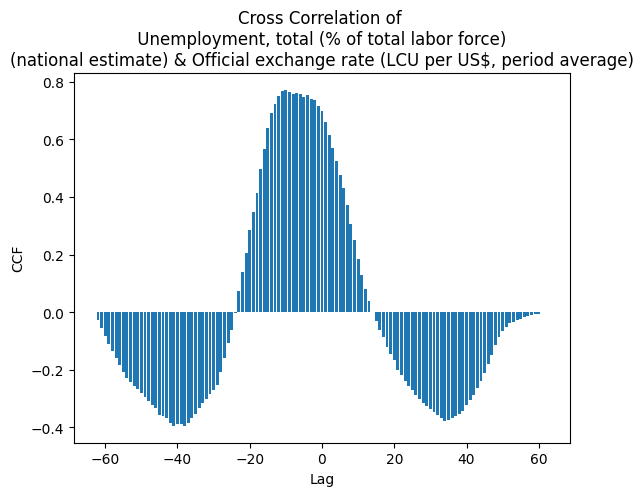

In [33]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) \n(national estimate) & Official exchange rate (LCU per US$, period average)')
plt.show()

Cross Correlation Value : 0.5615938664286724
in Lag : -2


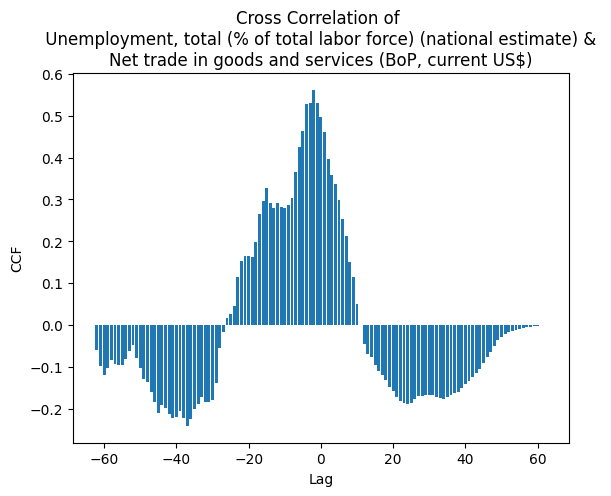

In [34]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) (national estimate) & \nNet trade in goods and services (BoP, current US$)')
plt.show()

Cross Correlation Value : 0.8567616289786834
in Lag : -11


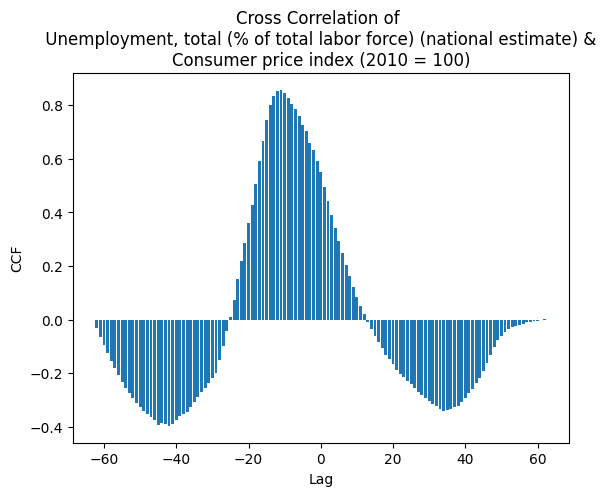

In [35]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Unemployment, total (% of total labor force) (national estimate)'],
                                         indonesia_df['Consumer price index (2010 = 100)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Unemployment, total (% of total labor force) (national estimate) & \nConsumer price index (2010 = 100)')
plt.show()

Cross Correlation Value : -0.45698859513676854
in Lag : 53


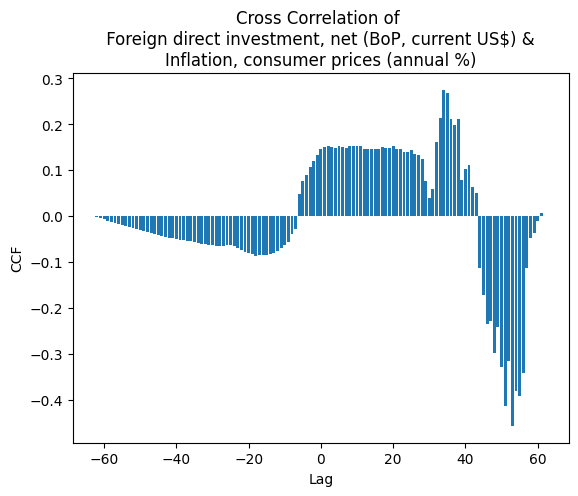

In [36]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                         indonesia_df['Inflation, consumer prices (annual %)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Foreign direct investment, net (BoP, current US$) & \nInflation, consumer prices (annual %)')
plt.show()

Cross Correlation Value : 0.34612363662928347
in Lag : 54


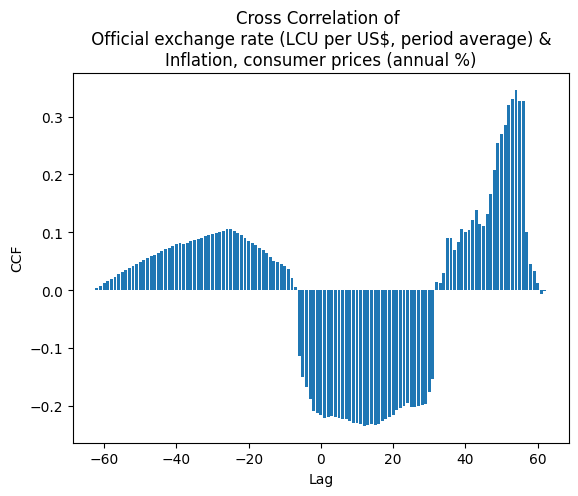

In [37]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                         indonesia_df['Inflation, consumer prices (annual %)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Official exchange rate (LCU per US$, period average) & \nInflation, consumer prices (annual %)')
plt.show()

Cross Correlation Value : 0.5440311493838894
in Lag : 56


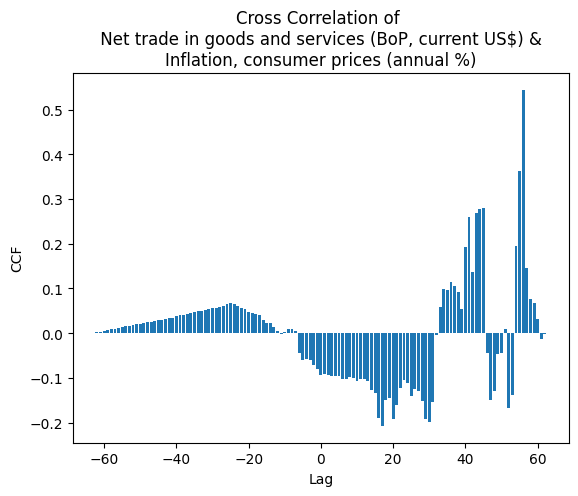

In [38]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                         indonesia_df['Inflation, consumer prices (annual %)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Net trade in goods and services (BoP, current US$) & \nInflation, consumer prices (annual %)')
plt.show()

Cross Correlation Value : 0.38881084226748813
in Lag : 54


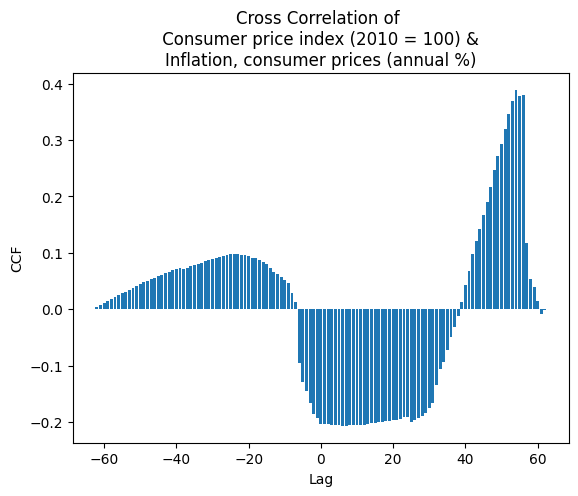

In [39]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Consumer price index (2010 = 100)'],
                                         indonesia_df['Inflation, consumer prices (annual %)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Consumer price index (2010 = 100) & \nInflation, consumer prices (annual %)')
plt.show()

Cross Correlation Value : -0.7327928500495955
in Lag : 0


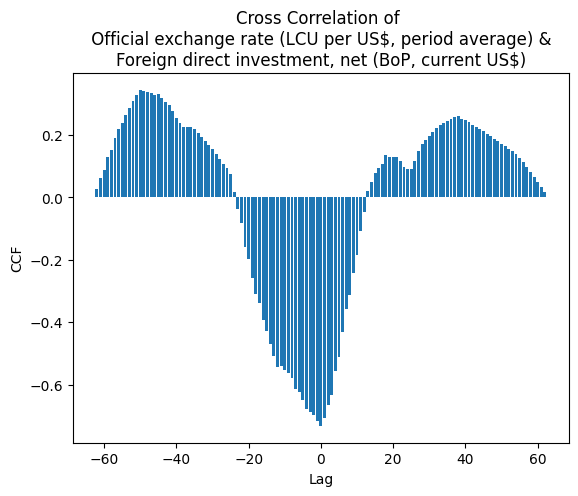

In [40]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                         indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Official exchange rate (LCU per US$, period average) & \nForeign direct investment, net (BoP, current US$)')
plt.show()

Cross Correlation Value : -0.5391373935820527
in Lag : -11


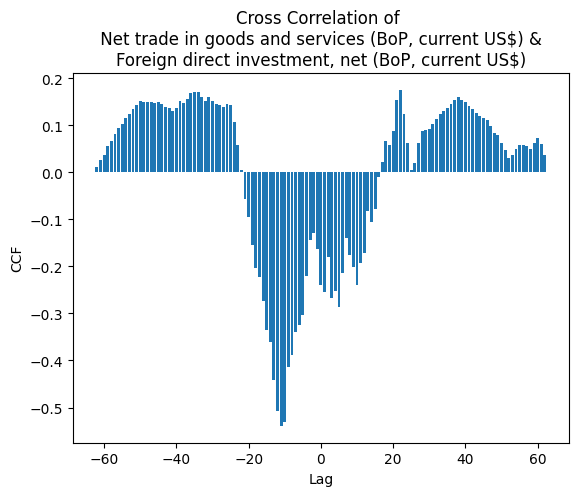

In [41]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                         indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Net trade in goods and services (BoP, current US$) & \nForeign direct investment, net (BoP, current US$)')
plt.show()

Cross Correlation Value : -0.8721704327685441
in Lag : 0


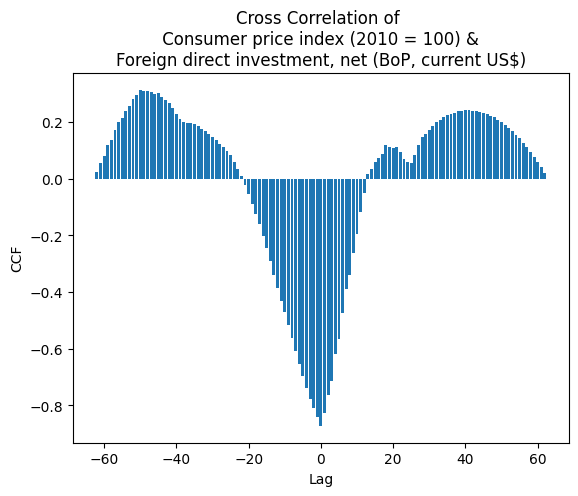

In [42]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Consumer price index (2010 = 100)'],
                                         indonesia_df['Foreign direct investment, net (BoP, current US$)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Consumer price index (2010 = 100) & \nForeign direct investment, net (BoP, current US$)')
plt.show()

Cross Correlation Value : 0.5568802111422705
in Lag : 1


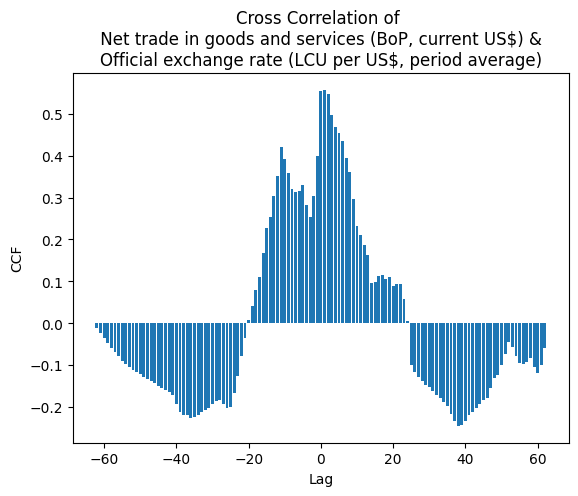

In [43]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                         indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                        )

max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Net trade in goods and services (BoP, current US$) & \nOfficial exchange rate (LCU per US$, period average)')
plt.show()

Cross Correlation Value : 0.9582010937713316
in Lag : 0


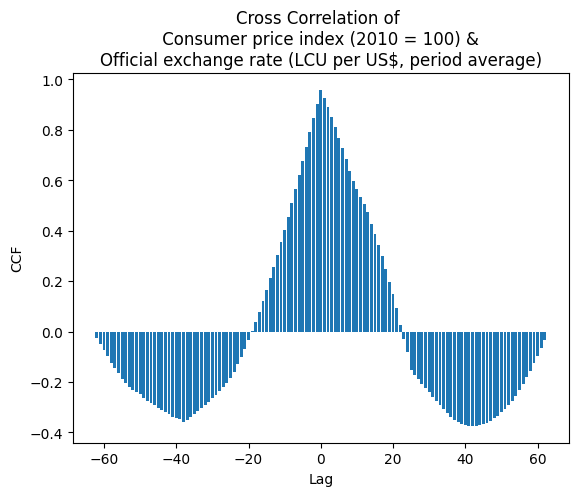

In [44]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Consumer price index (2010 = 100)'],
                                         indonesia_df['Official exchange rate (LCU per US$, period average)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)

plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Consumer price index (2010 = 100) & \nOfficial exchange rate (LCU per US$, period average)')
plt.show()

Cross Correlation Value : 0.5098791916820538
in Lag : 11


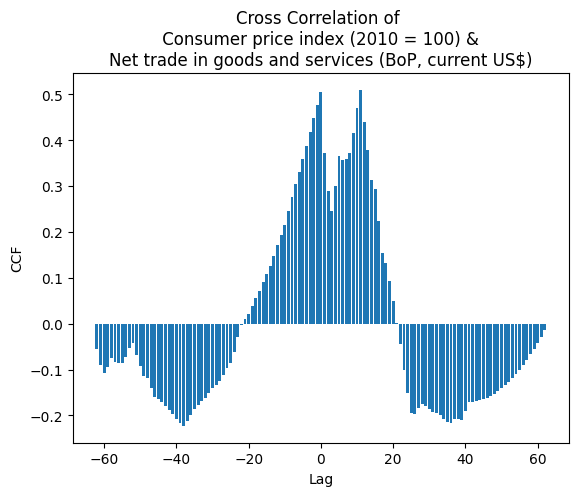

In [45]:
from statsmodels.tsa.stattools import ccf
laging, array_ccf = cross_correlation_ccf(indonesia_df['Consumer price index (2010 = 100)'],
                                         indonesia_df['Net trade in goods and services (BoP, current US$)'],
                                        )
max_index_cor = np.argmax(np.abs(array_ccf))
max_lag = laging[max_index_cor]
print('Cross Correlation Value :',array_ccf[max_index_cor])
print('in Lag :',max_lag)


plt.bar(laging, array_ccf)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.title('Cross Correlation of \n Consumer price index (2010 = 100) & \nNet trade in goods and services (BoP, current US$)')
plt.show()

# Granger Causality

In [46]:
import pandas as pd
import numpy as np
from itertools import permutations
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import warnings

# Example usage:
# Assuming df is your DataFrame with multiple columns
# Replace it with your actual DataFrame
df = pd.DataFrame({
    'ts1': np.random.normal(0, 1, 100),
    'ts2': np.random.normal(0, 10, 100),
    'ts3': np.random.normal(0, 100, 100),
})

indonesia_df_copy = indonesia_df.copy()
indonesia_df_copy = indonesia_df_copy.rename({
    "GDP per capita (current US$)":"GDP",
    "Unemployment, total (% of total labor force) (national estimate)":"Unemployment(%)",
    "Inflation, consumer prices (annual %)":"Inflation(%)",
    "Foreign direct investment, net (BoP, current US$)":"FDI",
    "Official exchange rate (LCU per US$, period average)":"ex_rate",
    "Net trade in goods and services (BoP, current US$)":"Net Trade",
    "Consumer price index (2010 = 100)":"CPI"
},axis=1) 

granger_results = granger_causality_all_pairs(indonesia_df_copy, max_lag=18, verbose=False)
# print(granger_results[('ts1', 'ts2')])

edges = []

i = 0
j = 0
for keys_item in granger_results.keys():
    j+=1
    if(granger_results[keys_item]['lags_used']!=[]):
        print(keys_item,
              granger_results[keys_item]['lags_used'],
              granger_results[keys_item]['differencing_steps'],
              granger_results[keys_item]['first_value_difference'],
              sep="\n")
        print(64*'=')
        i+=1
        edges.append(keys_item)
edges

('GDP', 'Inflation(%)')
[11, 14, 15]
{'GDP': 3, 'Inflation(%)': 0}
{'GDP': array([ 0.        ,  0.        , 53.33819572]), 'Inflation(%)': array([], dtype=float64)}
('GDP', 'FDI')
[1, 2, 4, 5, 6, 7, 8, 9, 13, 14]
{'GDP': 3, 'FDI': 2}
{'GDP': array([ 0.        ,  0.        , 53.33819572]), 'FDI': array([ 0.00e+00, -1.33e+08])}
('GDP', 'ex_rate')
[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17]
{'GDP': 3, 'ex_rate': 1}
{'GDP': array([ 0.        ,  0.        , 53.33819572]), 'ex_rate': array([149.58333333])}
('GDP', 'Net Trade')
[2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 18]
{'GDP': 3, 'Net Trade': 2}
{'GDP': array([ 0.        ,  0.        , 53.33819572]), 'Net Trade': array([0.000e+00, 2.257e+09])}
('GDP', 'CPI')
[1, 2, 10, 11, 12, 13, 14, 15, 16, 17]
{'GDP': 3, 'CPI': 2}
{'GDP': array([ 0.        ,  0.        , 53.33819572]), 'CPI': array([0.00195804, 0.00179646])}
('FDI', 'GDP')
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
{'FDI': 2, 'GDP': 3}
{'FDI': array([ 0.00e+00, -1.

[('GDP', 'Inflation(%)'),
 ('GDP', 'FDI'),
 ('GDP', 'ex_rate'),
 ('GDP', 'Net Trade'),
 ('GDP', 'CPI'),
 ('FDI', 'GDP'),
 ('FDI', 'ex_rate'),
 ('FDI', 'Net Trade'),
 ('FDI', 'CPI'),
 ('ex_rate', 'FDI'),
 ('ex_rate', 'CPI'),
 ('Net Trade', 'GDP'),
 ('Net Trade', 'Unemployment(%)'),
 ('Net Trade', 'FDI'),
 ('Net Trade', 'ex_rate'),
 ('Net Trade', 'CPI'),
 ('CPI', 'GDP'),
 ('CPI', 'FDI'),
 ('CPI', 'ex_rate'),
 ('CPI', 'Net Trade')]

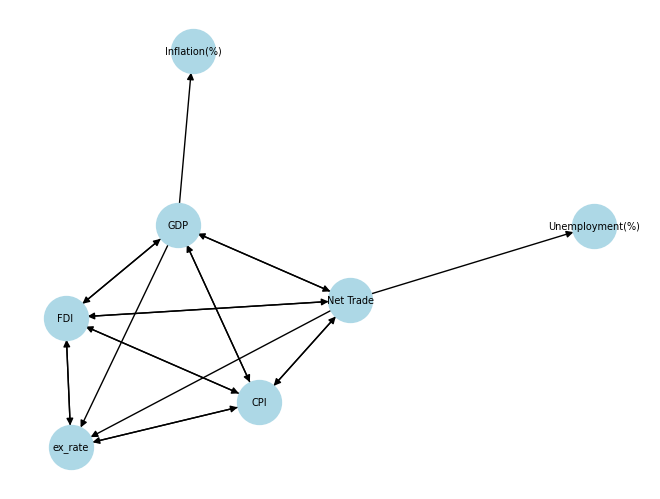

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()
G.add_nodes_from(indonesia_df_copy.columns.tolist())
G.add_edges_from(edges)

nx.draw_kamada_kawai(G, with_labels=True,
                     font_size=7,
                     node_color='lightblue',
                     node_size=1000,
                    )
plt.show()
# G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

In [48]:
list_gdp_y = list(granger_results.keys())
list_gdp_y = [x for x in list_gdp_y if x[1] == 'GDP']
list_gdp_y

granger_results_gdp_only = {key: granger_results[key] for key in list_gdp_y}

for keys_item in granger_results_gdp_only.keys():
    if(granger_results_gdp_only[keys_item]['lags_used']!=[]):
        print(keys_item,
              granger_results_gdp_only[keys_item]['lags_used'],
              granger_results_gdp_only[keys_item]['differencing_steps'],
              granger_results_gdp_only[keys_item]['first_value_difference'],
              sep="\n")
        print(64*'=')

('FDI', 'GDP')
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
{'FDI': 2, 'GDP': 3}
{'FDI': array([ 0.00e+00, -1.33e+08]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}
('Net Trade', 'GDP')
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
{'Net Trade': 2, 'GDP': 3}
{'Net Trade': array([0.000e+00, 2.257e+09]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}
('CPI', 'GDP')
[17, 18]
{'CPI': 2, 'GDP': 3}
{'CPI': array([3.80202758e-05, 2.77683800e-04]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}


# Periodogram

## GDP

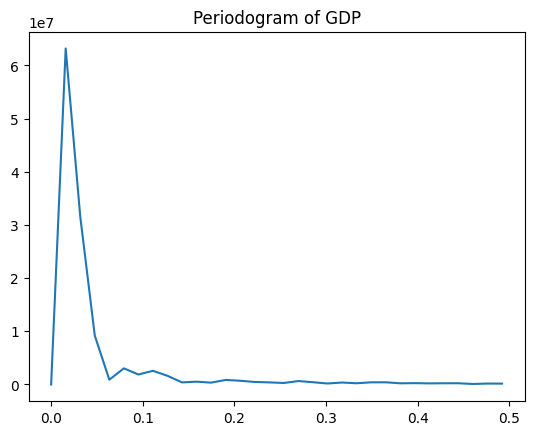

,Frequency,PSD,Period
0,0.015873,6.317242e+07,63.000000
1,0.031746,3.159680e+07,31.500000
2,0.047619,9.195499e+06,21.000000
3,0.079365,3.032572e+06,12.600000
4,0.111111,2.569950e+06,9.000000
5,0.095238,1.873959e+06,10.500000
6,0.126984,1.626467e+06,7.875000
7,0.063492,8.989349e+05,15.750000
8,0.190476,8.571021e+05,5.250000
9,0.206349,6.975935e+05,4.846154


In [49]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['GDP'])

pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of GDP')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

## Unemployement

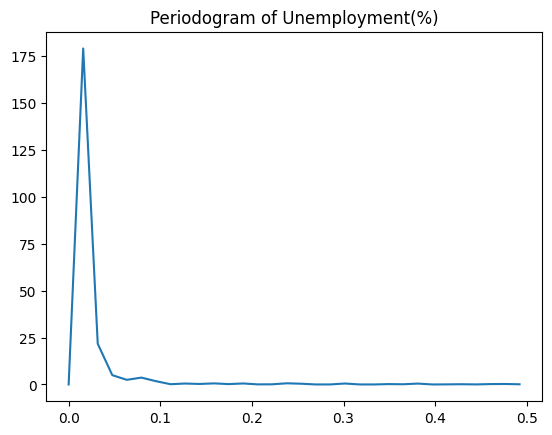

,Frequency,PSD,Period
0,0.015873,178.850237,63.000000
1,0.031746,21.675392,31.500000
2,0.047619,4.970269,21.000000
3,0.079365,3.659096,12.600000
4,0.063492,2.471681,15.750000
5,0.095238,1.761637,10.500000
6,0.238095,0.627750,4.200000
7,0.158730,0.578586,6.300000
8,0.190476,0.534489,5.250000
9,0.301587,0.513263,3.315789


In [50]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['Unemployment(%)'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of Unemployment(%)')
plt.plot(freq, psd)
plt.show()

display(pdf.head(15))

## Inflation(%)

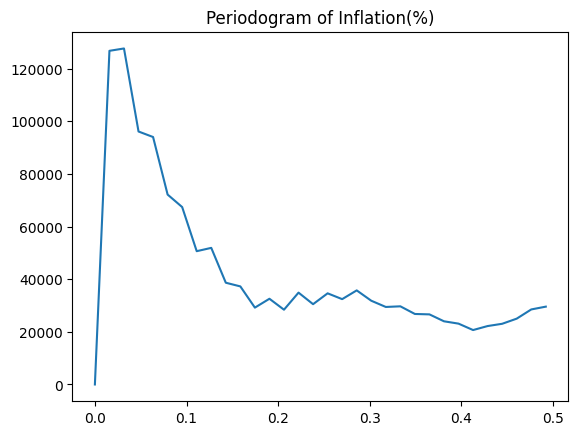

,Frequency,PSD,Period
0,0.031746,127677.138638,31.500
1,0.015873,126785.981228,63.000
2,0.047619,96127.533065,21.000
3,0.063492,94031.574949,15.750
4,0.079365,72162.586681,12.600
5,0.095238,67416.933077,10.500
6,0.126984,51910.683725,7.875
7,0.111111,50649.086885,9.000
8,0.142857,38664.055007,7.000
9,0.158730,37264.516230,6.300


In [51]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['Inflation(%)'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of Inflation(%)')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

## FDI

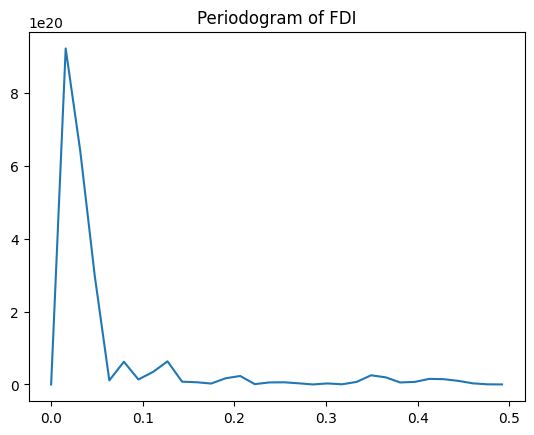

,Frequency,PSD,Period
0,0.015873,9.223301e+20,63.000000
1,0.031746,6.415731e+20,31.500000
2,0.047619,2.978052e+20,21.000000
3,0.126984,6.353312e+19,7.875000
4,0.079365,6.240885e+19,12.600000
5,0.111111,3.429975e+19,9.000000
6,0.349206,2.522149e+19,2.863636
7,0.206349,2.327722e+19,4.846154
8,0.365079,1.955142e+19,2.739130
9,0.190476,1.706334e+19,5.250000


In [52]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['FDI'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of FDI')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

## EX RATE

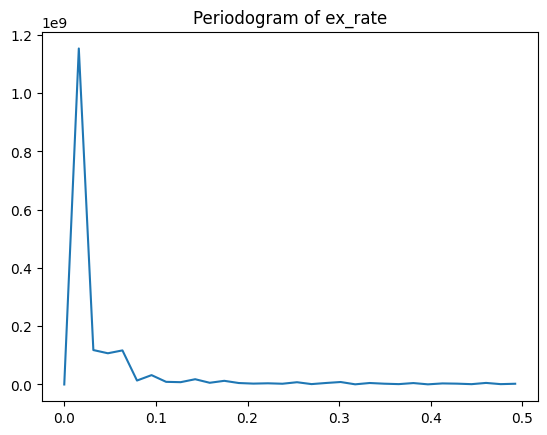

,Frequency,PSD,Period
0,0.015873,1.153707e+09,63.000000
1,0.031746,1.181760e+08,31.500000
2,0.063492,1.170131e+08,15.750000
3,0.047619,1.071544e+08,21.000000
4,0.095238,3.209464e+07,10.500000
5,0.142857,1.803349e+07,7.000000
6,0.079365,1.353027e+07,12.600000
7,0.174603,1.255359e+07,5.727273
8,0.111111,9.069952e+06,9.000000
9,0.301587,8.459421e+06,3.315789


In [53]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['ex_rate'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of ex_rate')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

## Net Trade

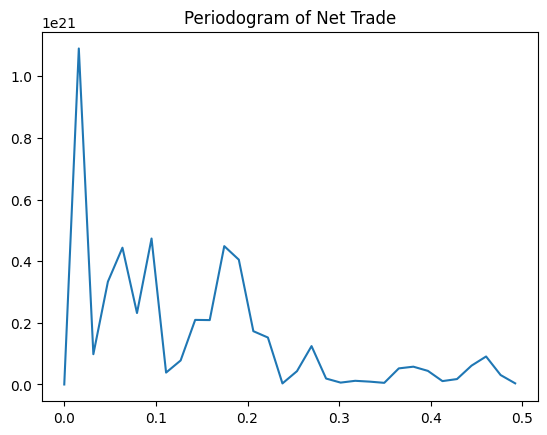

,Frequency,PSD,Period
0,0.015873,1.090199e+21,63.000000
1,0.095238,4.735563e+20,10.500000
2,0.174603,4.488630e+20,5.727273
3,0.063492,4.438311e+20,15.750000
4,0.190476,4.049645e+20,5.250000
5,0.047619,3.336043e+20,21.000000
6,0.079365,2.317896e+20,12.600000
7,0.142857,2.095201e+20,7.000000
8,0.158730,2.089284e+20,6.300000
9,0.206349,1.729080e+20,4.846154


In [54]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['Net Trade'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of Net Trade')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

## CPI

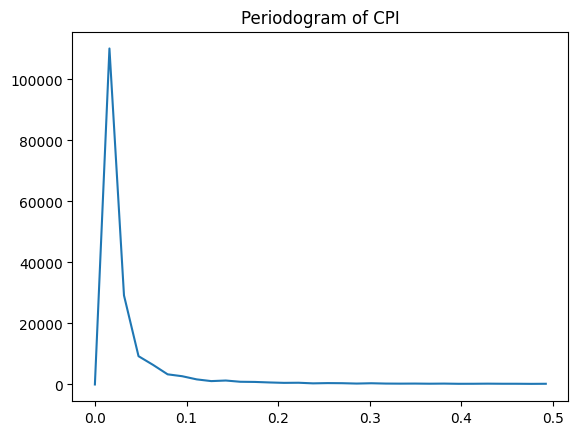

,Frequency,PSD,Period
0,0.015873,110128.114306,63.000000
1,0.031746,29199.272895,31.500000
2,0.047619,9273.580129,21.000000
3,0.063492,6416.387539,15.750000
4,0.079365,3327.388723,12.600000
5,0.095238,2706.782266,10.500000
6,0.111111,1669.945736,9.000000
7,0.142857,1295.723113,7.000000
8,0.126984,1105.998113,7.875000
9,0.158730,887.564569,6.300000


In [55]:
from scipy.signal import periodogram

freq, psd = periodogram(indonesia_df_copy['CPI'])
pdf = pd.DataFrame({'Frequency': freq, 'PSD': psd})
pdf = pdf.sort_values('PSD',ascending=False)
pdf['Period'] = 1/pdf['Frequency']
pdf = pdf.reset_index(drop=True)

plt.title('Periodogram of CPI')
plt.plot(freq, psd)
plt.show()

display(pdf.head(11))

# ARIMA

## GDP

In [56]:
from pmdarima.arima import auto_arima
import pmdarima as pm

opsi_arima = {
    'start_p': 0,
    'start_q': 0,
    'max_p': 4,
    'max_q': 4,
    'max_d': 5,
    'start_P': 0,
    'start_Q': 0,
    'max_P': 4,
    'max_Q': 4,
    'max_D': 5,
    'max_order': 12,
    'max_iter':100,
    'stepwise': True,
    'information_criterion':'aic',
    'seasonal': True,
    'm': 9,
}

# 'aic'  : ARIMA(0,2,2)(0,0,0)[0] 
# 'bic'  : ARIMA(0,2,1)(0,0,0)[0]
# 'hqic' : ARIMA(0,2,1)(0,0,0)[0]          


# 'aic'  : ARIMA(0,2,2)(0,0,0)[9]
# 'bic'  : ARIMA(0,2,1)(0,0,0)[9]
# 'hqic' : ARIMA(0,2,1)(0,0,0)[9]          



train_data = indonesia_df_copy['GDP'][:54]
test_data = indonesia_df_copy['GDP'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 9),
      suppress_warnings=True, with_intercept=False)

MAPE : 0.1407209290535124


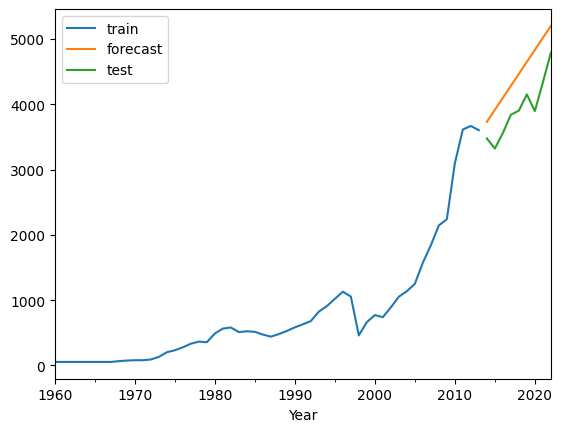

In [57]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()


# ARIMA(0,2,1)(0,0,0)[0] : 0.19564604737185984
# ARIMA(0,2,2)(0,0,0)[0] : 0.1407209290535124
# ARIMA(0,2,1)(0,0,0)[9] : 0.19564604737185984
# ARIMA(0,2,2)(0,0,0)[9] : 0.1407209290535124

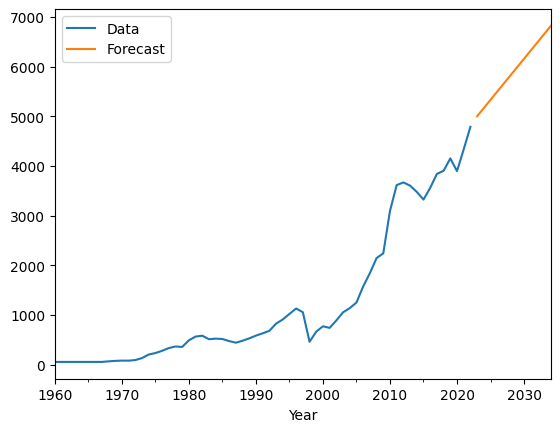

In [58]:
model_arima = model_arima.fit(y=indonesia_df_copy['GDP'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['GDP'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [59]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -405.040
Date:                Sat, 10 Feb 2024   AIC                            816.080
Time:                        05:33:47   BIC                            822.413
Sample:                    01-01-1960   HQIC                           818.562
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6814      0.095     -7.156      0.000      -0.868      -0.495
ma.L2         -0.2163      0.091     -2.380      0.017      -0.394      -0.038
sigma2      3.348e+04   3496.143      9.577      0.000    2.66e+04    4.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                80.20
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              64.68   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Unemployment

In [60]:
from pmdarima.arima import auto_arima
# Seasonal = 7
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'aic',
    'seasonal': True,'m': 1,
}

# 'aic'  :  ARIMA(0,1,0)(0,0,2)[7] intercept
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[7]          
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[7]          

# 'aic'  :  ARIMA(0,1,0)(0,0,0)[0]
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[0]                    
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[0]

train_data = indonesia_df_copy['Unemployment(%)'][:54]
test_data  = indonesia_df_copy['Unemployment(%)'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

MAPE : 0.09872791158498782


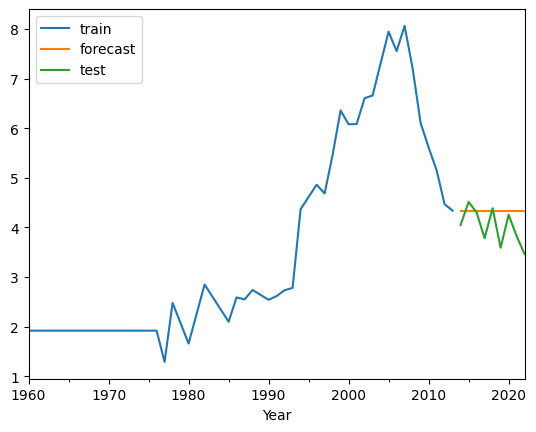

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()


# ARIMA(0,1,0)(0,0,2)[7] intercept : 0.19630207375968636
# ARIMA(0,1,0)(0,0,0)[7]           : 0.15333445343947916
# ARIMA(0,1,0)(0,0,0)[0]           : 0.15333445343947916

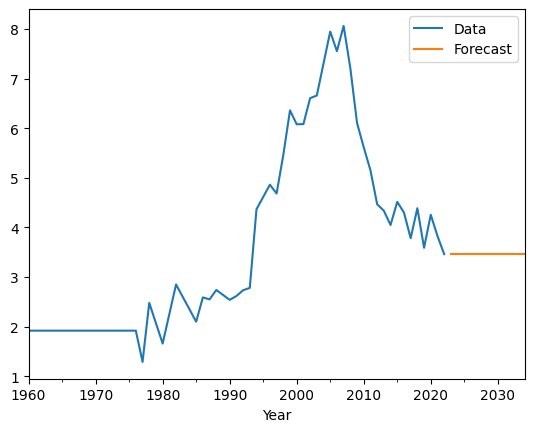

In [62]:
model_arima = model_arima.fit(y=indonesia_df_copy['Unemployment(%)'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['Unemployment(%)'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [63]:
display(model_arima.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -42.469
Date:                Sat, 10 Feb 2024   AIC                             86.938
Time:                        05:33:49   BIC                             89.065
Sample:                    01-01-1960   HQIC                            87.773
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2304      0.033      6.972      0.000       0.166       0.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.17
Prob(Q):                              0.90   Prob(JB):                         0.05
Heteroskedasticity (H):               2.70   Skew:                             0.58
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Inflation(%)

In [64]:
from pmdarima.arima import auto_arima
# Seasonal = 9
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'bic',
    'seasonal': True,'m': 9,
}

# 'aic'  :  ARIMA(1,0,0)(0,0,0)[0] intercept
# 'bic'  :  ARIMA(1,0,0)(0,0,0)[0]               
# 'hqic' :  ARIMA(1,0,0)(0,0,0)[0]           

# 'aic'  :  ARIMA(1,0,0)(0,0,0)[9] intercept
# 'bic'  :  ARIMA(1,0,0)(0,0,0)[9]                   
# 'hqic' :  ARIMA(1,0,0)(0,0,0)[9]          

train_data = indonesia_df_copy['Inflation(%)'][:54]
test_data  = indonesia_df_copy['Inflation(%)'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 9),
      suppress_warnings=True, with_intercept=False)

MAPE : 0.9252433657729363


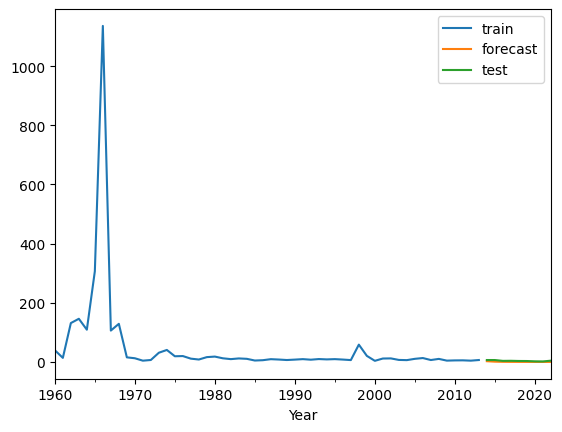

In [65]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()


# ARIMA(1,0,0)(0,0,0)[0] intercept  : 14.295042314588134
# ARIMA(1,0,0)(0,0,0)[0]            :  0.9252433657729363
# ARIMA(1,0,0)(0,0,0)[9] intercept  : 14.295042314588134
# ARIMA(1,0,0)(0,0,0)[9]            :  0.9252433657729363

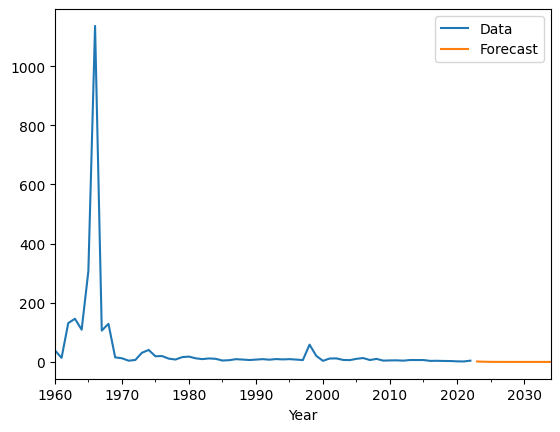

In [66]:
model_arima = model_arima.fit(y=indonesia_df_copy['Inflation(%)'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['Inflation(%)'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

## FDI

In [67]:
from pmdarima.arima import auto_arima
# Seasonal = 9
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'aic',
    'seasonal': True,'m': 9,
}

# 'aic'  :  ARIMA(0,1,0)(0,0,0)[0]          
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[0]                      
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[0]          
           
# 'aic'  :  ARIMA(0,1,0)(0,0,0)[9]          
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[9]                
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[9]                    

train_data = indonesia_df_copy['FDI'][:54]
test_data  = indonesia_df_copy['FDI'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 9),
      suppress_warnings=True, with_intercept=False)

MAPE : 0.2163781289068453


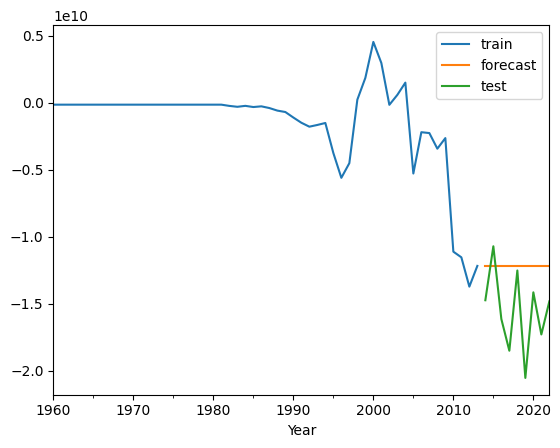

In [68]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()

# ARIMA(0,1,0)(0,0,0)[0] : 0.2163781289068453
# ARIMA(0,1,0)(0,0,0)[9] : 0.2163781289068453

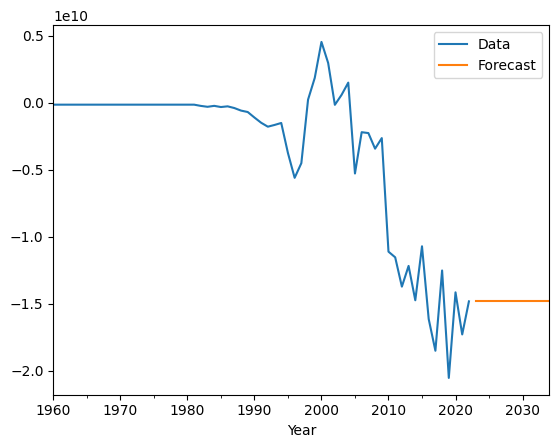

In [69]:
model_arima = model_arima.fit(y=indonesia_df_copy['FDI'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['FDI'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [70]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1431.212
Date:                Sat, 10 Feb 2024   AIC                           2864.424
Time:                        05:33:55   BIC                           2866.551
Sample:                    01-01-1960   HQIC                          2865.259
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.473e+18   7.12e+17      9.095      0.000    5.08e+18    7.87e+18
===================================================================================
Ljung-Box (L1) (Q):                  13.48   Jarque-Bera (JB):                27.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ex_rate

In [71]:
from pmdarima.arima import auto_arima
# Seasonal = 7
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'aic',
    'seasonal': True,'m': 7,
}

# 'aic'  :  ARIMA(0,1,0)(0,0,0)[0] intercept          
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[0]                            
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[0]          
           
# 'aic'  :  ARIMA(0,1,0)(0,0,0)[7] intercept          
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[7]                
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[7]                    

train_data = indonesia_df_copy['ex_rate'][:54]
test_data  = indonesia_df_copy['ex_rate'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True)

MAPE : 0.18850566671093957


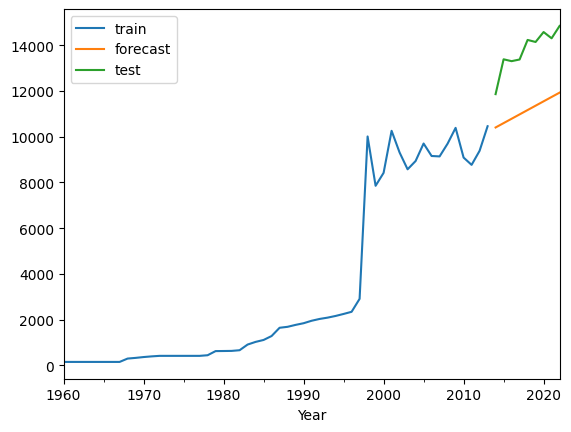

In [72]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()

# ARIMA(0,1,0)(0,0,0)[0] intercept : 0.019525229161994038         
# ARIMA(0,1,0)(0,0,0)[0]           : 0.05203075499324096
           
# ARIMA(0,1,0)(0,0,0)[7] intercept : 0.019525229161994038    
# ARIMA(0,1,0)(0,0,0)[7]           : 0.05203075499324096

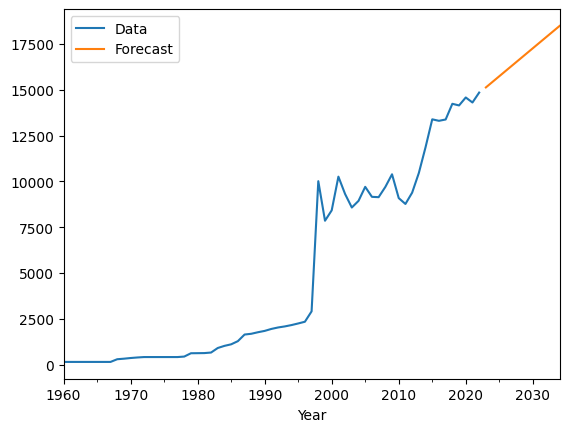

In [73]:
model_arima = model_arima.fit(y=indonesia_df_copy['ex_rate'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['ex_rate'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [74]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -518.235
Date:                Sat, 10 Feb 2024   AIC                           1042.471
Time:                        05:34:00   BIC                           1048.852
Sample:                    01-01-1960   HQIC                          1044.976
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    305.1725    236.567      1.290      0.197    -158.490     768.835
ma.L1         -0.1984      0.145     -1.372      0.170      -0.482       0.085
sigma2      1.128e+06   1.13e+05      9.968      0.000    9.06e+05    1.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2680.25
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               4.59   Skew:                             4.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Net Trade

In [75]:
from pmdarima.arima import auto_arima
# Seasonal = 7
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'hqic',
    'seasonal': True,'m': 7,
}

# 'aic'  :  ARIMA(0,1,0)(0,0,0)[0]                    
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[0]                            
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[0]          
           
# 'aic'  :  ARIMA(0,1,0)(0,0,0)[7]     
# 'bic'  :  ARIMA(0,1,0)(0,0,0)[7]                
# 'hqic' :  ARIMA(0,1,0)(0,0,0)[7]                    

train_data = indonesia_df_copy['Net Trade'][:54]
test_data  = indonesia_df_copy['Net Trade'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 7),
      suppress_warnings=True, with_intercept=False)

MAPE : 1.2006109702994614


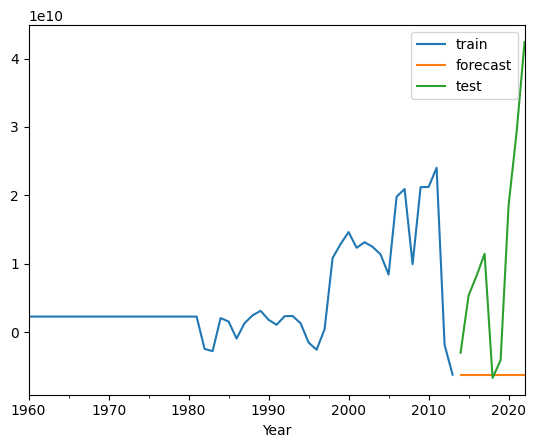

In [76]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()
         
# ARIMA(0,1,0)(0,0,0)[0] : 1.053724272750028 
# ARIMA(0,1,0)(0,0,0)[7] : 1.053724272750028

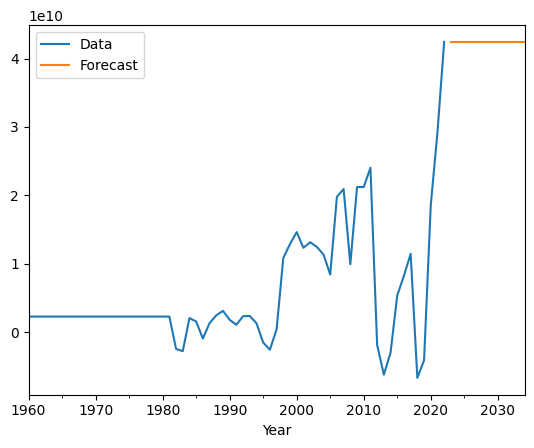

In [77]:
model_arima = model_arima.fit(y=indonesia_df_copy['Net Trade'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['Net Trade'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [78]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1487.775
Date:                Sat, 10 Feb 2024   AIC                           2977.550
Time:                        05:34:03   BIC                           2979.678
Sample:                    01-01-1960   HQIC                          2978.386
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.013e+19   3.54e+18     11.351      0.000    3.32e+19    4.71e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):               110.58
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## CPI

In [79]:
from pmdarima.arima import auto_arima
# Seasonal = 9
opsi_arima = {
    'start_p': 0,'start_q': 0,
    'max_p': 4,'max_q': 4,'max_d': 5,
    'start_P': 0,'start_Q': 0,
    'max_P': 4,'max_Q': 4,'max_D': 5,
    'max_order': 12,
    'max_iter':100,'stepwise': True,
    'information_criterion':'bic',
    'seasonal': True,'m': 9,
}

# 'aic'  :  ARIMA(0,2,1)(0,0,0)[0] intercept                    
# 'bic'  :  ARIMA(0,2,1)(0,0,0)[0]                            
# 'hqic' :  ARIMA(0,2,1)(0,0,0)[0] intercept          
           
# 'aic'  :  ARIMA(0,2,1)(0,0,0)[9] intercept     
# 'bic'  :  ARIMA(0,2,1)(0,0,0)[9]                          
# 'hqic' :  ARIMA(0,2,1)(0,0,0)[9] intercept                    

train_data = indonesia_df_copy['CPI'][:54]
test_data  = indonesia_df_copy['CPI'][54:]

model_arima = auto_arima(y=train_data, **opsi_arima)
model_arima

ARIMA(order=(0, 2, 1), scoring_args={}, seasonal_order=(0, 0, 0, 9),
      suppress_warnings=True, with_intercept=False)

MAPE : 0.020326449115769356


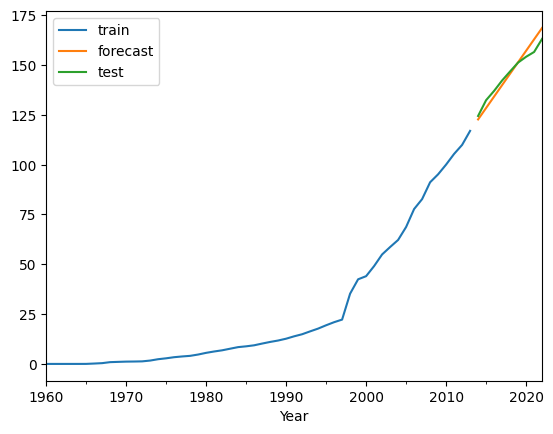

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()
hasil_fore = model_arima.predict(n_periods=len(test_data))
mapenya = mean_absolute_percentage_error(y_true=test_data, 
                                         y_pred=hasil_fore
                                        )
print(f'MAPE : {mapenya}')
train_data.plot(ax=ax, label='train')
hasil_fore.plot(ax=ax, label='forecast')
test_data.plot(ax=ax, label='test')
plt.legend(['train','forecast','test'])
plt.show()
         
# ARIMA(0,2,1)(0,0,0)[0] intercept  : 0.036543894420268515
# ARIMA(0,2,1)(0,0,0)[9] intercept  : 0.036543894420268515
# ARIMA(0,2,1)(0,0,0)[0]            : 0.020326449115769356
# ARIMA(0,2,1)(0,0,0)[9]            : 0.020326449115769356

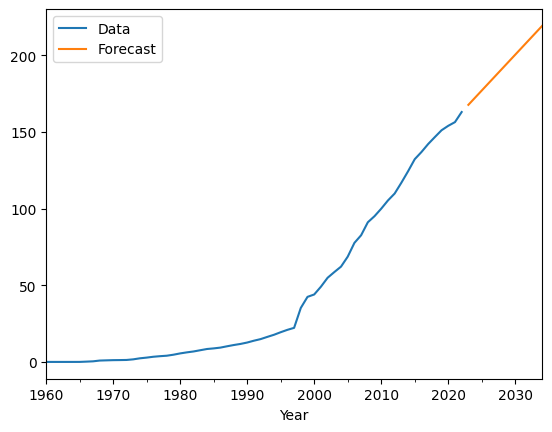

In [81]:
model_arima = model_arima.fit(y=indonesia_df_copy['CPI'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['CPI'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

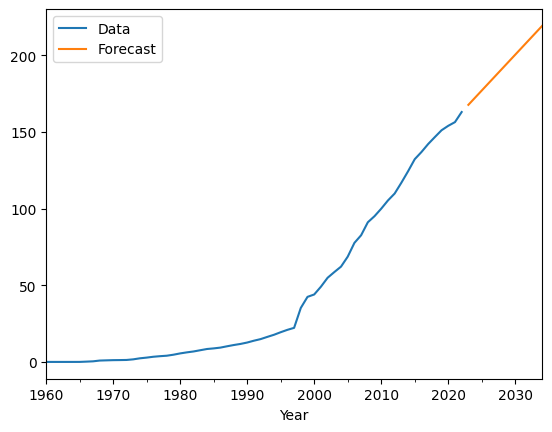

In [82]:
model_arima = model_arima.fit(y=indonesia_df_copy['CPI'])
result_forecast = model_arima.predict(n_periods=12)

fig, ax = plt.subplots()
indonesia_df_copy['CPI'].plot(ax=ax, label='Data')
result_forecast.plot(ax=ax, label='Forecast')
plt.legend(['Data','Forecast'])
plt.show()

In [83]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   63
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -128.153
Date:                Sat, 10 Feb 2024   AIC                            260.306
Time:                        05:34:06   BIC                            264.528
Sample:                    01-01-1960   HQIC                           261.960
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7069      0.065    -10.821      0.000      -0.835      -0.579
sigma2         3.8671      0.222     17.412      0.000       3.432       4.302
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               832.78
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              88.68   Skew:                             3.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# VAR

In [84]:
import statsmodels.api as sm
indonesia_df_copy_var = indonesia_df_copy.copy()
train_df = indonesia_df_copy_var[:54]
test_df = indonesia_df_copy_var[54:]
# print(indonesia_df_copy_var.head())

model_var = sm.tsa.VARMAX(train_df[['GDP','FDI','Net Trade','CPI']],
                          order=(1,0),
                          trend='c'
                         )
model_var_fit = model_var.fit(#method='cg',
                              maxiter=1000
)
display(model_var_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           30     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31650D+02    |proj g|=  1.41276D+03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   30      1     21      1     0     0   1.413D+03   1.316D+02
  F =   131.64957546644609     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Dep. Variable:,"['GDP', 'FDI', 'Net Trade', 'CPI']",No. Observations:,54
Model:,VAR(1),Log Likelihood,-7109.077
,+ intercept,AIC,14278.154
Date:,"Sat, 10 Feb 2024",BIC,14337.824
Time:,05:34:08,HQIC,14301.166
Sample:,01-01-1960,,
,- 01-01-2013,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"44.92, 39.85, 14.04, 48.57",Jarque-Bera (JB):,"53.61, 8.77, 140.03, 15.75"
Prob(Q):,"0.00, 0.00, 0.00, 0.00",Prob(JB):,"0.00, 0.01, 0.00, 0.00"
Heteroskedasticity (H):,"4.04, 2.51, 17.39, 4.02",Skew:,"1.91, 0.97, -2.11, 1.31"


MAPE VAR(1) : 79.26508235735442 %


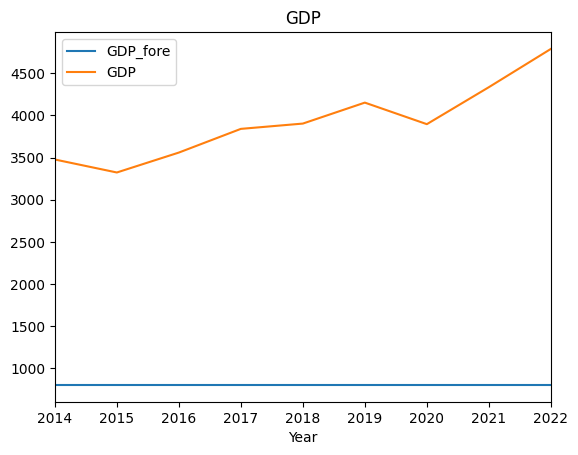

In [85]:
from sklearn.metrics import mean_absolute_percentage_error

fig, ax = plt.subplots()

fore_var = model_var_fit.forecast(len(test_df))
fore_var.columns = [i+'_fore' for i in fore_var.columns.tolist()]

mape_gdp_var = mean_absolute_percentage_error(y_true=test_df['GDP'],
                                             y_pred=fore_var['GDP_fore']
                                             )
print(f'MAPE VAR(1) : {mape_gdp_var * 100} %')

fore_var.plot(ax=ax,y='GDP_fore')
test_df.plot(ax=ax,y='GDP')
plt.title('GDP')
plt.show()

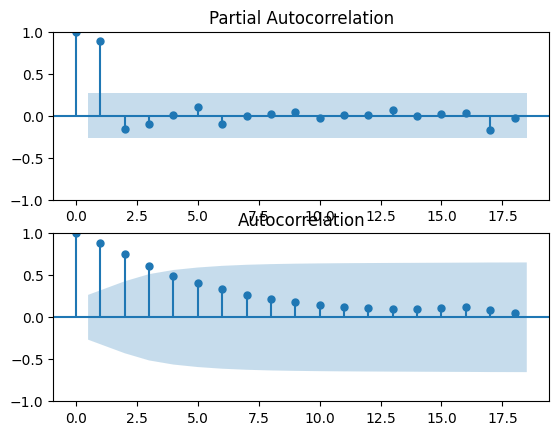

In [86]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig, ax = plt.subplots(2,1)
plot_pacf(model_var_fit.resid.GDP,ax=ax[0])
plot_acf(model_var_fit.resid.GDP,ax=ax[1])
plt.show()

In [87]:
adfuller(model_var_fit.resid.GDP)

(2.819601487084247,
 1.0,
 0,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 561.1194618936025)

# ARIMA-GARCH

## GDP

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_arima = SARIMAX(indonesia_df_copy[['GDP']],
                      order=(0,2,2),
                     )
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44240D+00    |proj g|=  2.00982D-02

At iterate    5    f=  6.43833D+00    |proj g|=  8.68755D-04

At iterate   10    f=  6.43500D+00    |proj g|=  9.87250D-03

At iterate   15    f=  6.42927D+00    |proj g|=  2.01370D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   4.760D-06   6.429D+00
  F =   6.4292071866177372     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   63
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -405.040
Date:                Sat, 10 Feb 2024   AIC                            816.080
Time:                        05:34:11   BIC                            822.413
Sample:                    01-01-1960   HQIC                           818.562
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6814      0.095     -7.156      0.000      -0.868      -0.495
ma.L2         -0.2163      0.091     -2.380      0.017      -0.394      -0.038
sigma2      3.348e+04   3496.143      9.577      0.000    2.66e+04    4.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                80.20
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              64.68   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Year'>

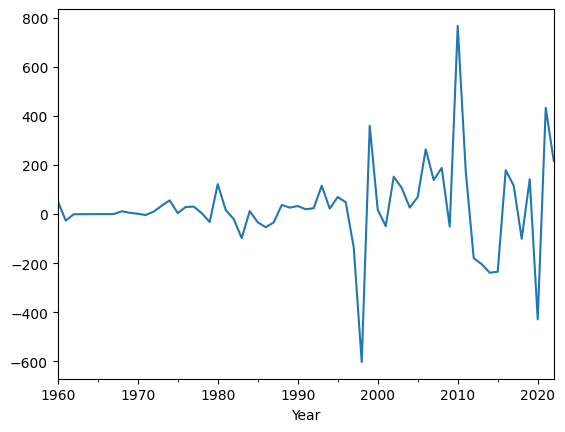

In [89]:
gdp_resid = model_arima_fit.resid
gdp_resid.plot()

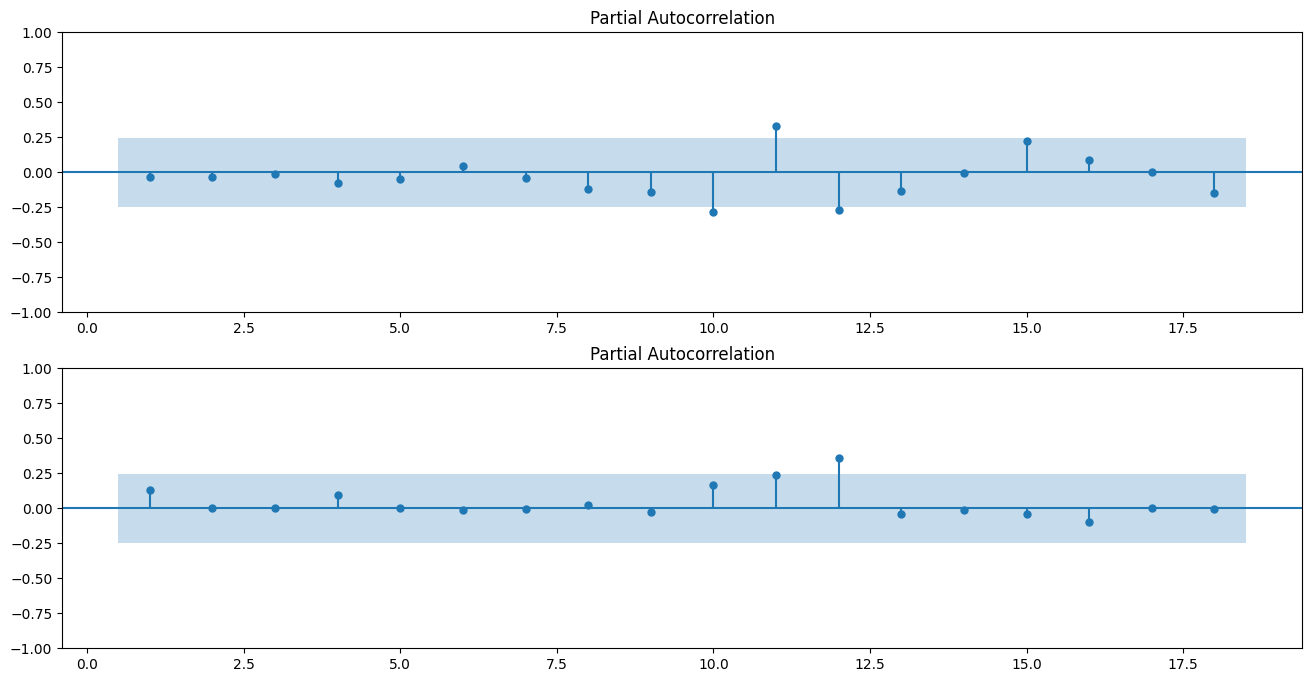

In [90]:
fig, ax = plt.subplots(2,1,figsize=(16,8))

plot_pacf(gdp_resid,ax=ax[0],zero=False) # gdp_resid
plot_pacf(gdp_resid**2,ax=ax[1],zero=False) # gdp_resid
plt.show()

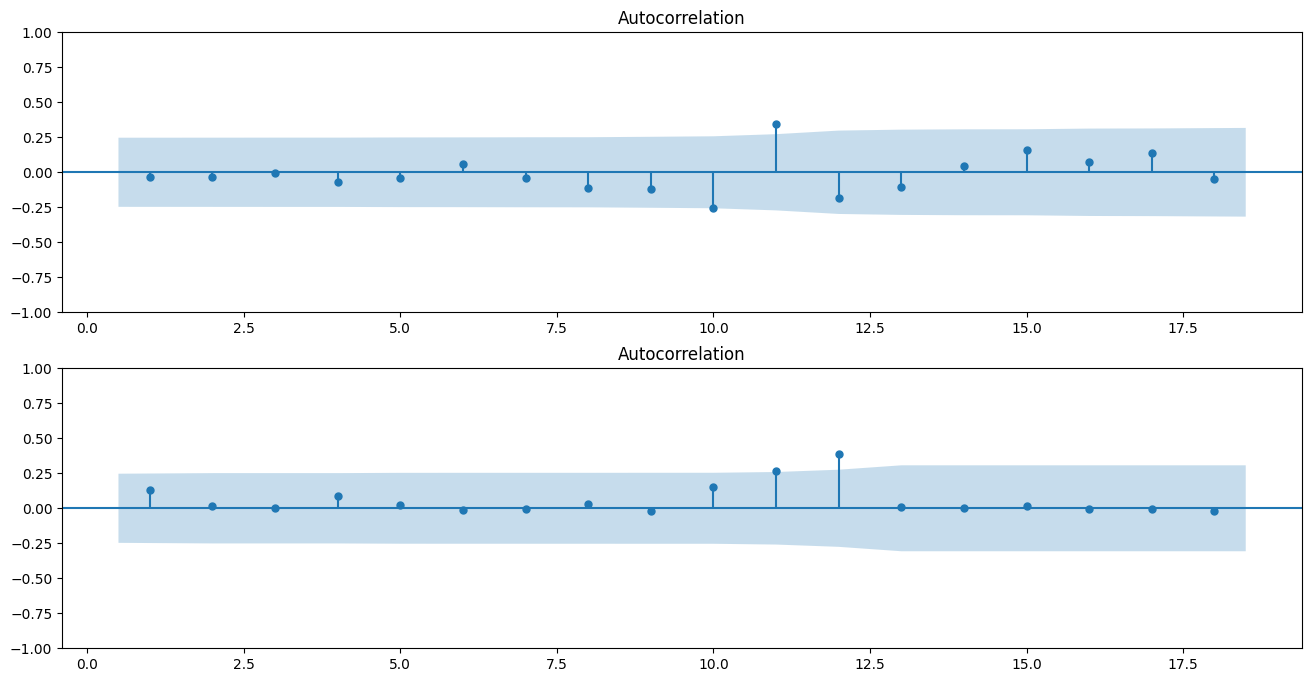

In [91]:
fig, ax = plt.subplots(2,1,figsize=(16,8))

plot_acf(gdp_resid,ax=ax[0],zero=False) # gdp_resid
plot_acf(gdp_resid**2,ax=ax[1],zero=False) # gdp_resid
plt.show()

In [92]:
from statsmodels.stats.diagnostic import het_arch
p_value_archlm = het_arch(gdp_resid)[1]
if(p_value_archlm < 0.05):
    print('ARCH LM : Reject H0')
    print('That Residual can modeling with ARCH/GARCH Model')
else:
    print('ARCH LM : Accept H0')
    print('That Residual cannot modeling with ARCH/GARCH Model')

ARCH LM : Accept H0
That Residual cannot modeling with ARCH/GARCH Model


# NeuralProphet

In [93]:
indonesia_df_copy_fore = indonesia_df_copy.copy()

# indonesia_df_copy_fore['diff2_FDI'] = indonesia_df_copy_fore['FDI'].diff().diff()
# indonesia_df_copy_fore['diff3_GDP'] = indonesia_df_copy_fore['GDP'].diff().diff().diff()
# indonesia_df_copy_fore['diff2_CPI'] = indonesia_df_copy_fore['CPI'].diff().diff()
# indonesia_df_copy_fore['diff2_Net Trade'] = indonesia_df_copy_fore['Net Trade'].diff().diff()
# indonesia_df_copy_fore['diff2_ex_rate'] = indonesia_df_copy_fore['ex_rate'].diff().diff()
# indonesia_df_copy_fore['diff_Unemployment(%)'] = indonesia_df_copy_fore['Unemployment(%)'].diff()
# list_drop_diff = ['FDI','GDP','CPI','Net Trade','ex_rate','Unemployment(%)']
# indonesia_df_copy_fore = indonesia_df_copy_fore.drop(list_drop_diff,axis=1)

indonesia_df_copy_fore

,GDP,Unemployment(%),Inflation(%),FDI,ex_rate,Net Trade,CPI
Year,,,,,,,
1960-01-01,53.338196,1.920,39.590444,-1.330000e+08,149.583333,2.257000e+09,0.000278
1961-01-01,53.338196,1.920,13.691932,-1.330000e+08,149.583333,2.257000e+09,0.000316
1962-01-01,53.338196,1.920,131.397849,-1.330000e+08,149.583333,2.257000e+09,0.000731
1963-01-01,53.338196,1.920,145.910781,-1.330000e+08,149.583333,2.257000e+09,0.001796
1964-01-01,53.338196,1.920,108.994709,-1.330000e+08,149.583333,2.257000e+09,0.003755
...,...,...,...,...,...,...,...
2018-01-01,3902.661676,4.387,3.198346,-1.251061e+10,14236.938773,-6.713373e+09,146.729898
2019-01-01,4151.227554,3.590,3.030587,-2.053107e+10,14147.671361,-4.133324e+09,151.176675
2020-01-01,3895.618152,4.255,1.920968,-1.414247e+10,14582.203468,1.854579e+10,154.080731


In [94]:
indonesia_df_copy_fore = indonesia_df_copy_fore.dropna()
indonesia_df_copy_fore_prop = indonesia_df_copy_fore.copy()
indonesia_df_copy_fore_prop = indonesia_df_copy_fore_prop.reset_index()
indonesia_df_copy_fore_prop = indonesia_df_copy_fore_prop.rename({
    "Year":"ds",
    "GDP":"y",
    #'diff3_GDP':"y"
},
axis=1)

indonesia_df_copy_fore_prop.head()

,ds,y,Unemployment(%),Inflation(%),FDI,ex_rate,Net Trade,CPI
0,1960-01-01,53.338196,1.92,39.590444,-133000000.0,149.583333,2.257000e+09,0.000278
1,1961-01-01,53.338196,1.92,13.691932,-133000000.0,149.583333,2.257000e+09,0.000316
2,1962-01-01,53.338196,1.92,131.397849,-133000000.0,149.583333,2.257000e+09,0.000731
3,1963-01-01,53.338196,1.92,145.910781,-133000000.0,149.583333,2.257000e+09,0.001796
4,1964-01-01,53.338196,1.92,108.994709,-133000000.0,149.583333,2.257000e+09,0.003755


In [95]:
indonesia_df_copy_fore_prop.describe().T

,count,mean,std,min,25%,50%,75%,max
y,63.0,1.248276e+03,1.403692e+03,5.333820e+01,2.546107e+02,5.826790e+02,1.706564e+03,4.787999e+03
Unemployment(%),63.0,3.637577e+00,1.879503e+00,1.290000e+00,1.920000e+00,2.740000e+00,4.648750e+00,8.060000e+00
Inflation(%),63.0,4.259516e+01,1.481995e+02,1.560130e+00,6.145101e+00,9.419058e+00,1.585632e+01,1.136254e+03
FDI,63.0,-3.480280e+09,5.998553e+09,-2.053107e+10,-4.121000e+09,-2.580000e+08,-1.330000e+08,4.550355e+09
ex_rate,63.0,4.893618e+03,5.180077e+03,1.495833e+02,4.150000e+02,1.950318e+03,9.348910e+03,1.484985e+04
Net Trade,63.0,5.795387e+09,8.959520e+09,-6.713373e+09,1.911000e+09,2.257000e+09,1.036869e+10,4.242661e+10
CPI,63.0,4.371392e+01,5.291144e+01,2.776838e-04,3.093075e+00,1.384444e+01,8.017711e+01,1.630718e+02


In [96]:
# list_col_drop = ['ex_rate','Unemployment(%)','Inflation(%)']
# indonesia_df_copy_fore_prop = indonesia_df_copy_fore_prop.drop(list_col_drop,
#                                                                axis=1
#                                                               )

In [97]:
# MeanAbsolutePercentageError
import torchmetrics
dir(torchmetrics.metric)

['ABC',
 'Any',
 'Callable',
 'CompositionalMetric',
 'Dict',
 'Generator',
 'List',
 'Metric',
 'Module',
 'Optional',
 'Sequence',
 'Tensor',
 'TorchMetricsUserError',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_flatten',
 '_neg',
 '_squeeze_if_scalar',
 'abstractmethod',
 'apply_to_collection',
 'contextmanager',
 'deepcopy',
 'dim_zero_cat',
 'dim_zero_max',
 'dim_zero_mean',
 'dim_zero_min',
 'dim_zero_sum',
 'functools',
 'gather_all_tensors',
 'inspect',
 'jit_distributed_available',
 'rank_zero_warn',
 'torch']

In [98]:
import torch
import torchmetrics
from torchmetrics import Metric

# print(torchmetrics.__dict__)

class mape_torch_met(Metric):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.add_state("total_absolute_percentage_error", default=torch.tensor(0), dist_reduce_fx="sum")
        self.add_state("total_num_elements", default=torch.tensor(0), dist_reduce_fx="sum")

    def update(self, preds: torch.Tensor, target: torch.Tensor) -> None:
        preds, target = self._input_format(preds, target)
        if preds.shape != target.shape:
            raise ValueError("preds and target must have the same shape")

        absolute_percentage_error = torch.abs((preds - target) / target)  # Calculate absolute percentage error
        self.total_absolute_percentage_error += torch.sum(absolute_percentage_error)
        self.total_num_elements += target.numel()

    def compute(self) -> torch.Tensor:
        return 100 * self.total_absolute_percentage_error.float() / self.total_num_elements  # Multiply by 100 for percentage
    
    

In [99]:
print(torchmetrics.__dict__["MeanAbsolutePercentageError"])

<class 'torchmetrics.regression.mape.MeanAbsolutePercentageError'>


In [100]:
from neuralprophet import NeuralProphet, set_log_level
from torchmetrics.metric import Metric


set_log_level("ERROR")

mod_neural_prophet = NeuralProphet(yearly_seasonality=False,
                                   weekly_seasonality=False,
                                   daily_seasonality=False,
                                   n_forecasts=5,
                                   n_changepoints=20,
                                   #collect_metrics={"MAPE": mape_torch_met,}
                                   #n_lags=11
                                  )
mod_neural_prophet.set_plotting_backend('matplotlib')

# "MeanAbsolutePercentageError"

mod_neural_prophet.add_lagged_regressor('FDI',)
mod_neural_prophet.add_lagged_regressor('CPI',)
mod_neural_prophet.add_lagged_regressor('Net Trade',)
mod_neural_prophet.add_lagged_regressor('ex_rate')
mod_neural_prophet.add_lagged_regressor('Unemployment(%)')
mod_neural_prophet.add_lagged_regressor('Inflation(%)')

metrics_np = mod_neural_prophet.fit(indonesia_df_copy_fore_prop,
                                    freq="YS",
                                    #metrics={"MAPE":mape_torch_met()},
                                   )
metrics_np

Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,2862.481201,3837.825195,0.295386,0.0,0
1,2999.171387,4093.372803,0.312041,0.0,1
2,2805.153809,3708.970947,0.284557,0.0,2
3,2838.765381,3809.651855,0.291814,0.0,3
4,2863.638428,3859.369629,0.292419,0.0,4
...,...,...,...,...,...
773,130.604355,184.644241,0.001072,0.0,773
774,128.489014,182.897049,0.001050,0.0,774
775,126.711021,177.663910,0.000990,0.0,775
776,132.031525,185.548615,0.001116,0.0,776


Predicting: 4it [00:00, ?it/s]

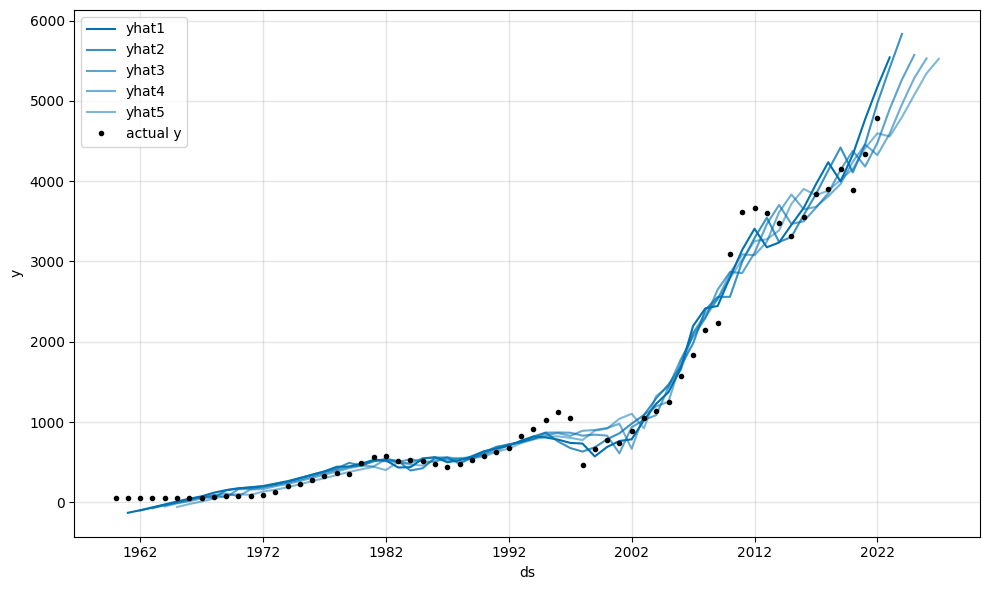

In [101]:
indonesia_df_copy_fut = mod_neural_prophet.make_future_dataframe(indonesia_df_copy_fore_prop,
                                                                 n_historic_predictions=True,
                                                                 periods=5)
forecast = mod_neural_prophet.predict(indonesia_df_copy_fut)

mod_neural_prophet.plot(forecast)

In [102]:
hasilnya = forecast[['ds','y','yhat1', 'yhat2', 'yhat3', 'yhat4', 'yhat5']]
hasilnya

,ds,y,yhat1,yhat2,yhat3,yhat4,yhat5
0,1960-01-01,53.338196,NaN,NaN,NaN,NaN,NaN
1,1961-01-01,53.338196,-129.610565,NaN,NaN,NaN,NaN
2,1962-01-01,53.338196,-98.253510,-100.500381,NaN,NaN,NaN
3,1963-01-01,53.338196,-63.760597,-63.800285,-73.997597,NaN,NaN
4,1964-01-01,53.338196,-26.213531,-32.475975,-34.411148,-51.193581,NaN
...,...,...,...,...,...,...,...
63,2023-01-01,NaN,5541.076660,5409.568848,4896.228516,4591.969238,4556.417480
64,2024-01-01,NaN,NaN,5832.747070,5265.458496,4955.600586,4797.206543
65,2025-01-01,NaN,NaN,NaN,5571.327637,5283.481445,5073.569824
66,2026-01-01,NaN,NaN,NaN,NaN,5528.991699,5341.903320


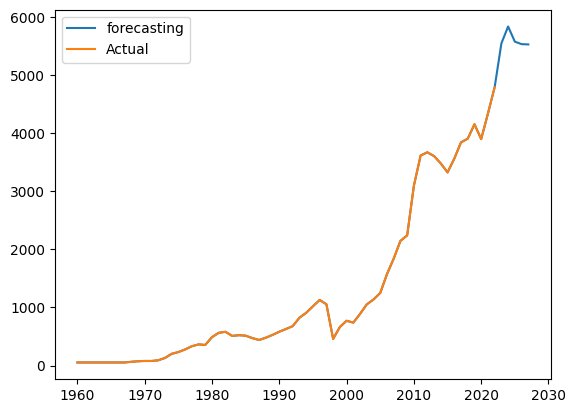

In [103]:
fore_has = forecast.copy()
fore_has['hasilnya'] = 0

for ind,row in forecast.iterrows():
    if (np.isnan(row['y']) == False):
        fore_has.loc[ind,'hasilnya'] = row['y'] 
    elif (np.isnan(row['yhat1']) == False):
        fore_has.loc[ind,'hasilnya'] = row['yhat1'] 
    elif (np.isnan(row['yhat2']) == False):
         fore_has.loc[ind,'hasilnya'] = row['yhat2']
    elif (np.isnan(row['yhat3']) == False):
        fore_has.loc[ind,'hasilnya'] = row['yhat3'] 
    elif (np.isnan(row['yhat4']) == False):
        fore_has.loc[ind,'hasilnya'] = row['yhat4']  
    else:
        fore_has.loc[ind,'hasilnya'] = row['yhat5'] 
        

# fig, ax = plt.subplots(1,1)  # Create a figure and axes object

fore_has = fore_has[['ds','hasilnya']]


plt.plot(fore_has['ds'],fore_has['hasilnya'])
plt.plot(hasilnya['ds'],hasilnya['y'])
plt.legend(['forecasting','Actual'])
plt.show()

In [104]:
fore_has = fore_has.set_index('ds')
fore_has

,hasilnya
ds,
1960-01-01,53.338196
1961-01-01,53.338196
1962-01-01,53.338196
1963-01-01,53.338196
1964-01-01,53.338196
...,...
2023-01-01,5541.076660
2024-01-01,5832.747070
2025-01-01,5571.327637


# mlforecast

In [105]:
from itertools import permutations

from sklearn.metrics import mean_absolute_percentage_error
from statsforecast import StatsForecast # required to instantiate StastForecast object and use cross-validation method
from statsforecast.models import (
    HistoricAverage,                              
    Naive,
    RandomWalkWithDrift,
)

indonesia_df_copy_statfor = indonesia_df_copy_fore_prop.copy()
indonesia_df_copy_statfor = indonesia_df_copy_statfor[['ds','y']]
indonesia_df_copy_statfor = indonesia_df_copy_statfor.sort_values(by='ds')
indonesia_df_copy_statfor['unique_id'] = 'indonesia'

models = [HistoricAverage(),Naive(),RandomWalkWithDrift()]

sf = StatsForecast(
    df = indonesia_df_copy_statfor, 
    models = models, 
    freq = 'YS', 
    n_jobs = -1
)

cv_df = sf.cross_validation(
    df = indonesia_df_copy_statfor,
    h = 7,
    step_size = 7,
    n_windows = 3
)

compare_df = cv_df.iloc[:,2:]
list_columns = list(permutations(compare_df.columns, 2))
list_columns = [i for i in list_columns if i[0] == 'y']

mape_list = []
model_list = []

for label_true, label_pred in list_columns:
    hasil_mape = mean_absolute_percentage_error(compare_df[label_true], compare_df[label_pred])
    mape_list.append(hasil_mape)
    model_list.append(label_pred)
print(model_list)
print(mape_list)

met_mod_df= pd.DataFrame({'model':model_list,'mape':mape_list})
met_mod_df

['HistoricAverage', 'Naive', 'RWD']
[0.76258224, 0.31231627, 0.26158482]


,model,mape
0,HistoricAverage,0.762582
1,Naive,0.312316
2,RWD,0.261585


('FDI', 'GDP')<br>
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]<br>
{'FDI': 2, 'GDP': 3}<br>
{'FDI': array([ 0.00e+00, -1.33e+08]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}<br>
================================================================<br>
('Net Trade', 'GDP')<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]<br>
{'Net Trade': 2, 'GDP': 3}<br>
{'Net Trade': array([0.000e+00, 2.257e+09]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}<br>
================================================================<br>
('CPI', 'GDP')<br>
[17, 18]<br>
{'CPI': 2, 'GDP': 3}<br>
{'CPI': array([3.80202758e-05, 2.77683800e-04]), 'GDP': array([ 0.        ,  0.        , 53.33819572])}<br>
================================================================<br>

In [106]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.feature_engineering import transform_exog


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

indonesia_df_copy_mlfor = indonesia_df_copy_fore_prop.copy()
indonesia_df_copy_mlfor['unique_id'] = 'indonesia'

# FDI,Net Trade, CPI
# list_col = ['unique_id',
#             'ds',
#             'y',
#             'FDI',
#             'CPI',
#             'Net Trade',
#            ]
list_col_dasar = ['unique_id','ds',]

indonesia_df_copy_mlfor_y = indonesia_df_copy_mlfor[list_col_dasar+['y']]
indonesia_df_copy_mlfor_fdi = indonesia_df_copy_mlfor[list_col_dasar+['FDI']]
indonesia_df_copy_mlfor_nettrade = indonesia_df_copy_mlfor[list_col_dasar+['Net Trade']]
indonesia_df_copy_mlfor_cpi = indonesia_df_copy_mlfor[list_col_dasar+['CPI']]

indonesia_df_copy_mlfor_fdi_te = transform_exog(
    df=indonesia_df_copy_mlfor_fdi,
    lags=[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,],
    #lag_transforms={1:Differences([1])}
)

indonesia_df_copy_mlfor_nettrade_te = transform_exog(
    df=indonesia_df_copy_mlfor_nettrade,
    lags=[1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,],
    #lag_transforms={1:Differences([1])}
)

indonesia_df_copy_mlfor_cpi_te = transform_exog(
    df=indonesia_df_copy_mlfor_cpi,
    lags=[17,18],
    #lag_transforms={1:Differences([1])}
)

# print(indonesia_df_copy_mlfor_fdi_te)
# print(indonesia_df_copy_mlfor_nettrade_te)
# print(indonesia_df_copy_mlfor_cpi_te)

indonesia_df_copy_mlfor_merge = indonesia_df_copy_mlfor_y.merge(
    indonesia_df_copy_mlfor_fdi_te,
    on=['unique_id','ds'],how='left'
)
indonesia_df_copy_mlfor_merge = indonesia_df_copy_mlfor_merge.merge(
    indonesia_df_copy_mlfor_nettrade_te,
    on=['unique_id','ds'],how='left'
)
indonesia_df_copy_mlfor_merge = indonesia_df_copy_mlfor_merge.merge(
    indonesia_df_copy_mlfor_cpi_te,
    on=['unique_id','ds'],how='left'
)


indonesia_df_copy_mlfor_merge = indonesia_df_copy_mlfor_merge.fillna(0)

display(indonesia_df_copy_mlfor_merge)

,unique_id,ds,y,FDI,FDI_lag4,FDI_lag5,FDI_lag6,FDI_lag7,FDI_lag8,FDI_lag9,...,Net Trade_lag11,Net Trade_lag12,Net Trade_lag13,Net Trade_lag14,Net Trade_lag15,Net Trade_lag16,Net Trade_lag17,CPI,CPI_lag17,CPI_lag18
0,indonesia,1960-01-01,53.338196,-1.330000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000278,0.000000,0.000000
1,indonesia,1961-01-01,53.338196,-1.330000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000316,0.000000,0.000000
2,indonesia,1962-01-01,53.338196,-1.330000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000731,0.000000,0.000000
3,indonesia,1963-01-01,53.338196,-1.330000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.001796,0.000000,0.000000
4,indonesia,1964-01-01,53.338196,-1.330000e+08,-1.330000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.003755,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,indonesia,2018-01-01,3902.661676,-1.251061e+10,-1.473320e+10,-1.217006e+10,-1.371623e+10,-1.152839e+10,-1.110633e+10,-2.628247e+09,...,2.091172e+10,1.978600e+10,8.411220e+09,1.134140e+10,1.245554e+10,1.313127e+10,1.231640e+10,146.729898,49.077933,44.016038
59,indonesia,2019-01-01,4151.227554,-2.053107e+10,-1.070448e+10,-1.473320e+10,-1.217006e+10,-1.371623e+10,-1.152839e+10,-1.110633e+10,...,9.917759e+09,2.091172e+10,1.978600e+10,8.411220e+09,1.134140e+10,1.245554e+10,1.313127e+10,151.176675,54.918265,49.077933
60,indonesia,2020-01-01,3895.618152,-1.414247e+10,-1.613592e+10,-1.070448e+10,-1.473320e+10,-1.217006e+10,-1.371623e+10,-1.152839e+10,...,2.119104e+10,9.917759e+09,2.091172e+10,1.978600e+10,8.411220e+09,1.134140e+10,1.245554e+10,154.080731,58.629266,54.918265
61,indonesia,2021-01-01,4334.215983,-1.728635e+10,-1.850204e+10,-1.613592e+10,-1.070448e+10,-1.473320e+10,-1.217006e+10,-1.371623e+10,...,2.121215e+10,2.119104e+10,9.917759e+09,2.091172e+10,1.978600e+10,8.411220e+09,1.134140e+10,156.484590,62.184580,58.629266


In [107]:
from itertools import combinations

def get_all_combinations(input_list):
    all_combinations = []
    n = len(input_list)

    # Loop untuk panjang kombinasi dari 1 hingga n
    for r in range(1, n + 1):
        # Menggunakan fungsi combinations untuk mendapatkan kombinasi
        current_combinations = combinations(input_list, r)
        
        # Mengonversi tuple menjadi list dan menambahkannya ke daftar semua kombinasi
        all_combinations.extend([list(comb) for comb in current_combinations])

    return all_combinations

In [108]:
# from tqdm import tqdm

# kombinasi_lags = get_all_combinations([i for i in range(10,21)])

# kombinasi_lagku_list = []
# mape_list = []
# model_list = []

# for komb_lag in tqdm(kombinasi_lags):
#     ml_for = MLForecast(models=[
#                             #LinearRegression(),
#                             RandomForestRegressor(),
#                             XGBRegressor()
#                         ],
#                         freq='YS',
#                         target_transforms=[
#                                             Differences([1]),
#                                           ],
#                         lags=komb_lag,
#                         #num_threads=4,
#                        )

#     cv_ml_for_df = ml_for.cross_validation(
#         df = indonesia_df_copy_mlfor,
#         h = 7,
#         step_size = 7,
#         n_windows = 3,
#     )
    
#     compare_df_ml = cv_ml_for_df.iloc[:,3:]
#     list_columns = list(permutations(compare_df_ml.columns, 2))
#     list_columns = [i for i in list_columns if i[0] == 'y']
    
#     for label_true, label_pred in list_columns:    
#         hasil_mape = mean_absolute_percentage_error(compare_df_ml[label_true], compare_df_ml[label_pred])
#         kombinasi_lagku_list.append(komb_lag)
#         mape_list.append(hasil_mape)
#         model_list.append(label_pred)
    
# hasil_mape_df = pd.DataFrame({'nama_model':model_list,'kombinasi_lags':kombinasi_lagku_list,'nilai_mape':hasil_mape,})
# hasil_mape_df = hasil_mape_df.sort_values('nilai_mape')
# display(hasil_mape_df)
#     #display(cv_ml_for_df)

# # plt.plot(cv_ml_for_df.ds,cv_ml_for_df.y,label='actual')
# # #plt.plot(cv_ml_for_df.ds,cv_ml_for_df.LinearRegression,label='LinearRegression')
# # plt.plot(cv_ml_for_df.ds,cv_ml_for_df.RandomForestRegressor,label='RandomForest')
# # plt.plot(cv_ml_for_df.ds,cv_ml_for_df.XGBRegressor,label='XGBRegressor')
# # plt.legend()
# # plt.show()

y LinearRegression
y RandomForestRegressor
y XGBRegressor


,nama_model,nilai_mape
0,LinearRegression,0.477083
1,RandomForestRegressor,0.477083
2,XGBRegressor,0.477083


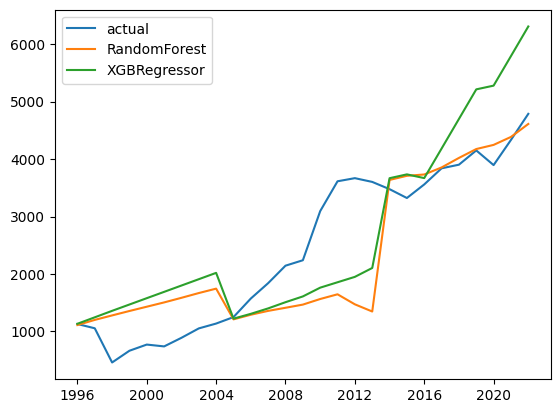

In [109]:
from tqdm import tqdm

mape_list = []
model_list = []

komb_lagku = [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25],
              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [7, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 23, 25],
              [7, 9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 25],
              [9, 10, 11, 12, 14, 15, 16, 18, 20, 21, 22, 25],
              [9, 10, 11, 12, 14, 15, 16, 20, 21, 22, 25],
              [9, 10, 11, 14, 15, 16, 20, 21, 22, 25],
              [9, 10, 11, 14, 15, 16, 21, 22, 25],
              [10, 11, 14, 15, 16, 21, 22, 25],
              [11, 14, 15, 16, 21, 22, 25],
              [14, 15, 16, 21, 22, 25],
              [15, 16, 21, 22, 25],
              [16, 21, 22, 25],
              [21, 22, 25],
              [22, 25],
              [25]
             ]

ml_for = MLForecast(models=[
                            LinearRegression(),
                            RandomForestRegressor(),
                            XGBRegressor()
                        ],
                        freq='YS',
                        target_transforms=[
                                            Differences([1]),
                                          ],
                        lags=komb_lagku[16]
                        #komb_lagku[16],
                        #num_threads=4,
                       )

cv_ml_for_df = ml_for.cross_validation(
        df = indonesia_df_copy_mlfor,
        h = 9,
        step_size = 9,
        n_windows = 3,
    )
    
compare_df_ml = cv_ml_for_df.iloc[:,3:]
list_columns = list(permutations(compare_df_ml.columns, 2))
list_columns = [i for i in list_columns if i[0] == 'y']
# print(compare_df_ml)


for label_true, label_pred in list_columns:
    print(label_true, label_pred)
    hasil_mape = mean_absolute_percentage_error(y_true=compare_df_ml[label_true],
                                                y_pred=compare_df_ml[label_pred]
                                               )
    mape_list.append(hasil_mape)
    model_list.append(label_pred)
    
hasil_mape_df = pd.DataFrame({'nama_model':model_list,
                              #'kombinasi_lags':kombinasi_lagku_list,
                              'nilai_mape':hasil_mape,
                             }
                            )
hasil_mape_df = hasil_mape_df.sort_values('nilai_mape')
display(hasil_mape_df)
    #display(cv_ml_for_df)

plt.plot(cv_ml_for_df.ds,cv_ml_for_df.y,label='actual')
#plt.plot(cv_ml_for_df.ds,cv_ml_for_df.LinearRegression,label='LinearRegression')
plt.plot(cv_ml_for_df.ds,cv_ml_for_df.RandomForestRegressor,label='RandomForest')
plt.plot(cv_ml_for_df.ds,cv_ml_for_df.XGBRegressor,label='XGBRegressor')
plt.legend()
plt.show()

In [110]:
from tqdm import tqdm
from itertools import permutations
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences

from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have already defined your data and required functions

mape_list = []
model_list = []

komb_lagku = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18,
              19,20,21,22,23,24,25]


best_model_params = None  # to store the best lag combination
best_mape = float('inf')  # initialize with a large value

# Perform backward selection
while len(komb_lagku) > 0:
    current_lag_set = komb_lagku.copy()

    # Create a list to store the MAPE values for each lag
    mape_values = []

    for lag_to_remove in current_lag_set:
        lag_set_to_use = [lag for lag in current_lag_set if lag != lag_to_remove]

        ml_for = MLForecast(
            models=[
                LinearRegression(),
                RandomForestRegressor(),
                XGBRegressor()
            ],
            freq='YS',
            target_transforms=[
                Differences([1]),
            ],
            lags=lag_set_to_use,
            # num_threads=4,
        )

        cv_ml_for_df = ml_for.cross_validation(
            df=indonesia_df_copy_mlfor,
            h=7,
            step_size=7,
            n_windows=3,
        )

        compare_df_ml = cv_ml_for_df.iloc[:, 3:]
        list_columns = list(permutations(compare_df_ml.columns, 2))
        list_columns = [i for i in list_columns if i[0] == 'y']

        for label_true, label_pred in list_columns:
            hasil_mape = mean_absolute_percentage_error(
                y_true=compare_df_ml[label_true],
                y_pred=compare_df_ml[label_pred]
            )
            mape_list.append(hasil_mape)
            model_list.append(label_pred)

        hasil_mape_df = pd.DataFrame({
            'nama_model': model_list,
            'nilai_mape': mape_list,
        })
        current_best_mape = hasil_mape_df['nilai_mape'].min()
        # print(f'current_best_mape: {current_best_mape}')
        # print(f'lag_set_to_use   : {lag_set_to_use}')
        # print('='*64)
        mape_values.append(current_best_mape)

    # Find the lag that results in the minimum error
    min_error_index = mape_values.index(min(mape_values))
    best_mape_pred = mape_values[min_error_index]
    
    if(best_mape_pred < best_mape):
        best_mape = best_mape_pred
        best_model_params = current_lag_set[:min_error_index] + current_lag_set[min_error_index+1:]
        
        print(f'best_mape           : {best_mape}')
        print(f'best_model_params   : {best_model_params}')
        print('='*64)
    else:
        break  

    # Remove the lag from the list
    komb_lagku.remove(current_lag_set[min_error_index])
    

    
# Display the best lag combination
# print("Best lag combination:", best_model_params)
# print('Best MAPE:', best_mape)


best_mape           : 0.22915775115361722
best_model_params   : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25]
best_mape           : 0.17251118991398276
best_model_params   : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25]
best_mape           : 0.1597280705097642
best_model_params   : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25]
best_mape           : 0.1535830063144885
best_model_params   : [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25]
best_mape           : 0.1495905983775164
best_model_params   : [1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25]
best_mape           : 0.14837468557724046
best_model_params   : [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25]
best_mape           : 0.14522270033879744
best_model_params   : [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25]
best_mape    

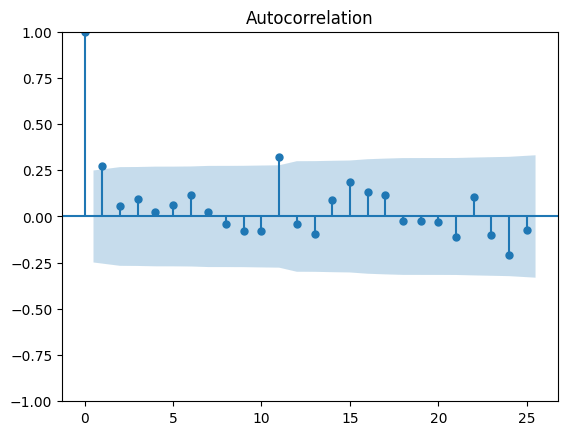

In [111]:
plot_acf(indonesia_df_copy_mlfor.y.diff().dropna(),
         lags=25,
         alpha=0.05,
         use_vlines=True
        )
# plt.axhline(y=0.05, color='r', linestyle='--')
# plt.axhline(y=-0.05, color='r', linestyle='--')
plt.show()

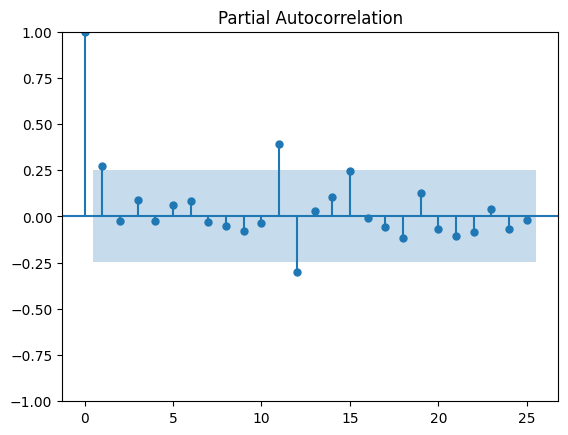

In [112]:
plot_pacf(indonesia_df_copy_mlfor.y.diff().dropna(),
          alpha=0.05,
          lags=25,
          use_vlines=True
         )
# plt.axhline(y=0.05, color='r', linestyle='--')
# plt.axhline(y=-0.05, color='r', linestyle='--')
plt.show()

In [113]:
hasil_mape_df.to_csv('best_lag.csv')

|    Model     |    MAPE   |
|--------------|-----------|
| ARIMA(0,2,2) |  14,07 %  |
|    VAR(1)    |  79,26 %  |
|   XGboost    |   8,43 %  |